# Home Price Prediction
## Part I 
0. Summary
1. Data Cleaning
2. Feature Engineering<br> 
    2.1 Transform ordered categorical variables to numeric <br>
    2.2 Combine different levels for categorical variables to linearize the relationship<br>    
3. Exploratory Data Analysis
4. Data Preparation <br>
    4.1 Dummy Variable creation<br>
5. Model Building and Evaluation
6. Variable Importance

## Part II : Assignment Questions
1. Q1 Ridge and Lasso regression with twice the alpha
2. Q3 Drop top 5 variables

### 0. Summary

1. Simple Linear Regression is used to find a suitable model. 
2. Variable selection is done based on p values and VIF
3. Lasso and Ridge regression is applied on the model thus selected
4. Lasso regression is also evaluated for Feature reduction where feasible.
5. 5 fold Cross Validation is used on train dataset is used to determine the optimum alpha parmeter. Coarse and fine tuning is performed.
6. Train Test is split on 80:20 split
7. 5 fold CV is only applied on Train dataset
8. Using the optimum parameter ridge/lasso regression is fitted on the train data and also  evaluated on the unseen test data.
9. Model performance is evaluated on the unseen test data
10. Variable importance for both Ridge/Lasso regression is evaluated using the magnitude of the coefficients. Higher magnitude implies high variable importance.
11. Redidual Diagnostics are also performed to check for heteroscedasticity and normality of the residuals besides p value, F Statistic and VIF.

Based on the variables selected in Lasso Regression the following 5 variables are the most important. <br>
The variable importance can be assessed based on the magnitude of the coefficients. <br>
Higher magnitude imply higher weight within the model.
These 5 variables together explain roughly 69% of the variance in SalesPrice. This is calculated by only using these 5 variables in the regression

1. RoofMatl: Roof material
2. 1stFlrSF: First Floor square feet
3. TotalBsmtSF: Total square feet of basement area
4. 2ndFlrSF: Second floor square feet
5. BsmtFinSF1: Type 1 finished square feet

The 
Based on Lasso Regression the following 36 features in order of importance are able to explain 88% of the model variance

|Variable	|Lasso Abs Coeff	|Lasso Coeff|
| :- | :- | :- |
|RoofMatl_WdShngl	|0.840215	|0.840215|
|RoofMatl_Membran	|0.787858	|0.787858|
|RoofMatl_CompShg	|0.754625	|0.754625|
|RoofMatl_Metal	|0.752713	|0.752713|
|RoofMatl_Tar&Grv	|0.742879	|0.742879|
|RoofMatl_WdShake	|0.737492	|0.737492|
|RoofMatl_Roll	|0.735633	|0.735633|
|1stFlrSF	|0.298833	|0.298833|
|TotalBsmtSF	|0.213084	|0.213084|
|2ndFlrSF	|0.150987	|0.150987|
|BsmtFinSF1	|0.145169	|0.145169|
|OverallQual	|0.113394	|0.113394|
|LotArea	|0.102336	|0.102336|
|BedroomAbvGr	|0.073718	|-0.073718|
|KitchenAbvGr	|0.0618	|-0.0618|
|OverallCond	|0.057348	|0.057348|
|TotRmsAbvGrd	|0.056579	|0.056579|
|Neighborhood_NoRidge	|0.05568	|0.05568|
|Neighborhood_NridgHt	|0.050474	|0.050474|
|Neighborhood_StoneBr	|0.049601	|0.049601|
|Bsmnt	|0.047033	|-0.047033|
|HouseAge	|0.046884	|-0.046884|
|KitchenQual	|0.035204	|0.035204|
|BsmtExposure	|0.035077	|0.035077|
|ExterQual	|0.033771	|0.033771|
|SaleType_New	|0.029879	|0.029879|
|MSZoning_FV	|0.026751	|0.026751|
|MasVnrArea	|0.026704	|0.026704|
|Fireplaces	|0.026061	|0.026061|
|Functional	|0.021843	|0.021843|
|MSSubClass_120	|0.021665	|-0.021665|
|MoSold_10	|0.015309	|-0.015309|
|LotConfig	|0.015113	|0.015113|
|Condition1_Norm	|0.013605	|0.013605|
|MSZoning_RL	|0.009957	|0.009957|
|Remodeled	|0.008131	|0.008131|

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import os
import warnings
warnings.filterwarnings('ignore')

In [273]:
# read the data
data = pd.read_csv("train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## 1. Data Cleaning

In [274]:
# it can be seen Id just corresponds to row number and hence can be dropped
data.drop(['Id'], axis = 1, inplace = True)

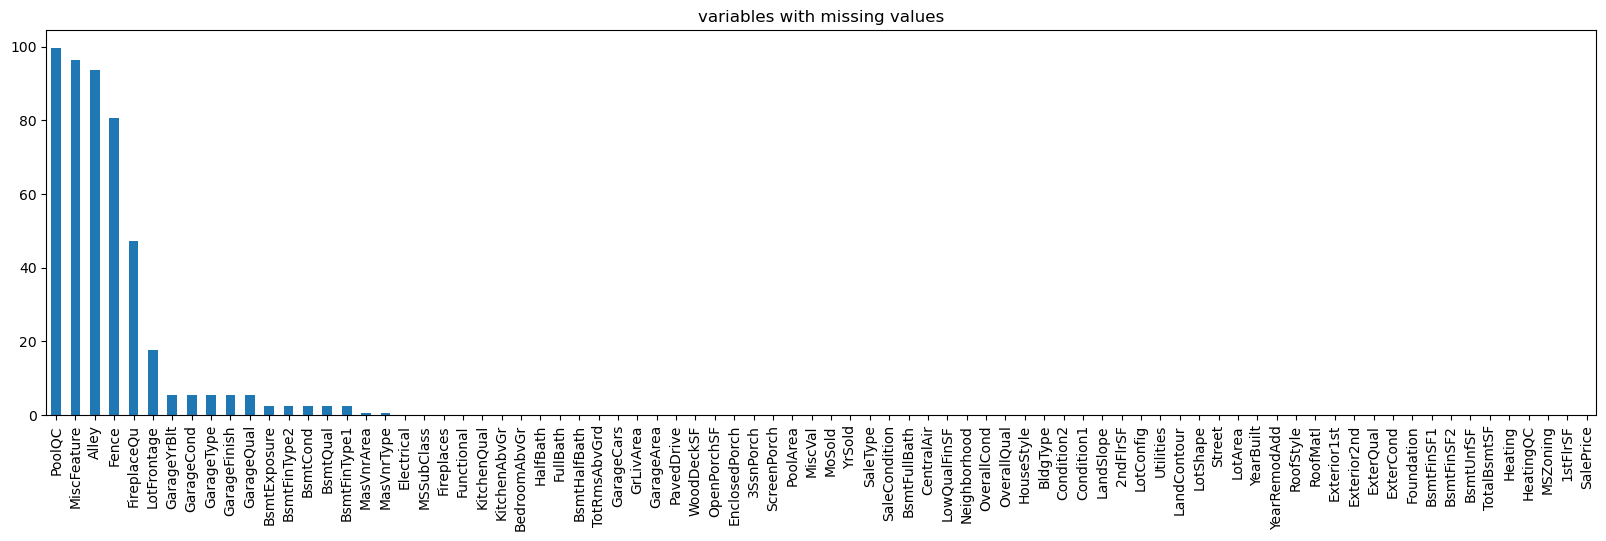

In [275]:
## visualize missing values
missing = data.isna().sum().div(len(data)).mul(100).sort_values(ascending=False)
plt.figure(figsize=(20,5))
missing.plot.bar().set(title='variables with missing values')
plt.show()

In [276]:
# drop variables with more than 50% missing values
data.drop(['PoolQC','MiscFeature','Alley','Fence'], axis = 1, inplace = True)

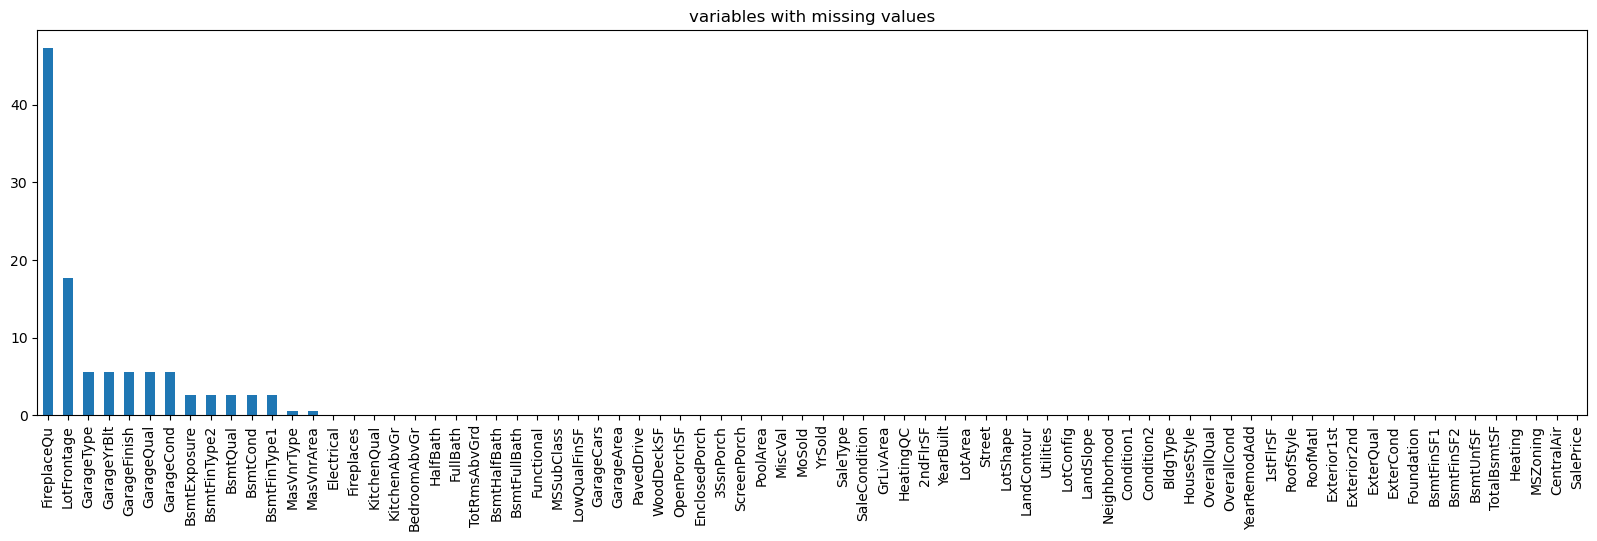

In [277]:
## visualize missing values
missing = data.isna().sum().div(len(data)).mul(100).sort_values(ascending=False)
plt.figure(figsize=(20,5))
missing.plot.bar().set(title='variables with missing values')
plt.show()

In [278]:
# look at variable types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [279]:
#list of categorical variables
categorical = ['OverallQual', 'OverallCond', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
               'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
               'HouseStyle', 'RoofStyle', 'RoofMatl', 
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
               'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
               'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

#list of numeric variables
numeric = ['SalePrice','LotFrontage', 'LotArea',  
           'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars', 'GarageArea', 'WoodDeckSF', 
           'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

date = ['YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']

In [280]:
# display columns with NA values
data[data.columns[data.isna().any()]].isna().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [281]:
#create dummy variables for NA values
data['Fireplace'] = data['FireplaceQu'].notnull()
data['LotFrontage_d'] = data['LotFrontage'].notnull()
data['Garage'] = data['GarageCond'].notnull()
data['Bsmnt'] = data['BsmtCond'].notnull()

data[['Fireplace','LotFrontage_d','Garage','Bsmnt']] = data[['Fireplace','LotFrontage_d','Garage','Bsmnt']].replace([False,True], 
                                                                                                                    [0,1])


In [282]:
# for categorical replace NA values with "No Values"
data[categorical]=data[categorical].fillna("No Value")

# for numeric replace NA values with 0
data[numeric]=data[numeric].fillna(0)

#### GarageYrBlt will be missing in case of no Garage so no need to remove

## 2. Feature Engineering

In [283]:
# Create Age Variable
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
data['RemodAge'] = data['YrSold'] - data['YearRemodAdd']
data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']

# fill 0 for no garages
data['GarageAge'] = data['GarageAge'].fillna(0)

#Create a flag for Remodeled
data['Remodeled'] = data['YearRemodAdd']!=data['YearBuilt']

# Drop variables
data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1, inplace = True)

### 2.1 Transform ordered categorical variables to numeric
#### given the large number of categorical variables and small number of observations it makes sense to have bare minimum level of categorical variables and also transform ordered categorical variables to numeric variables for better use in linear regression 

In [284]:
#Columns categories (Poor<Fair<Typical/Average<Good<Excellent)
ordinal1 = ['ExterQual','ExterCond', 'BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
data[ordinal1] = data[ordinal1].replace(['No Value', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])


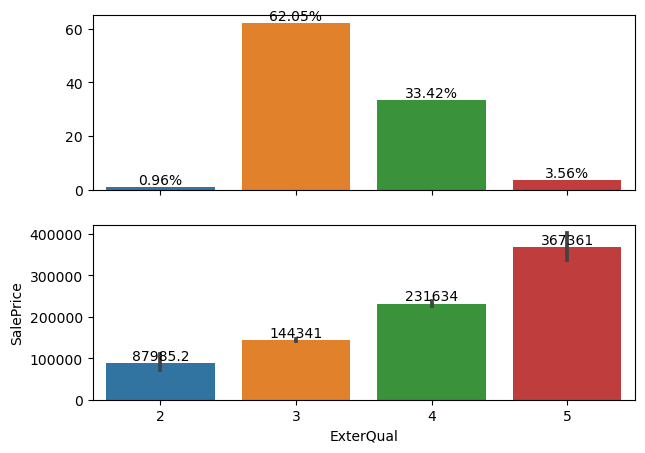

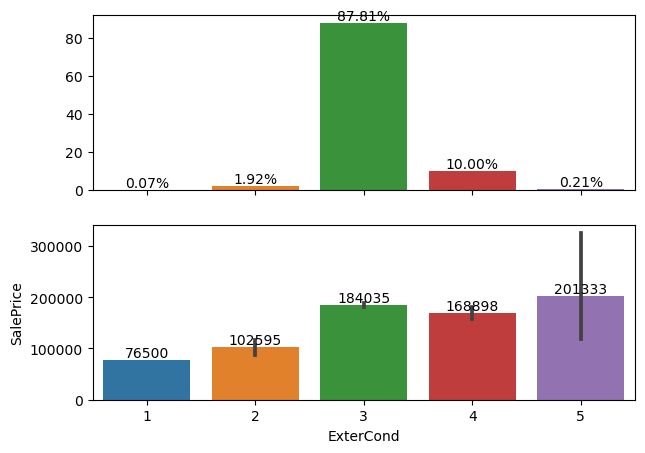

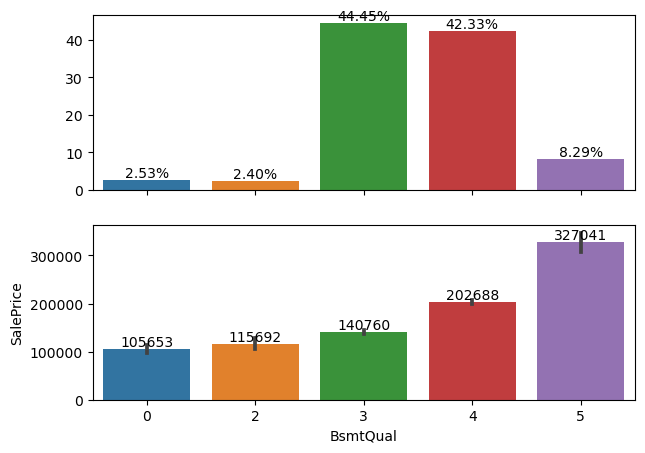

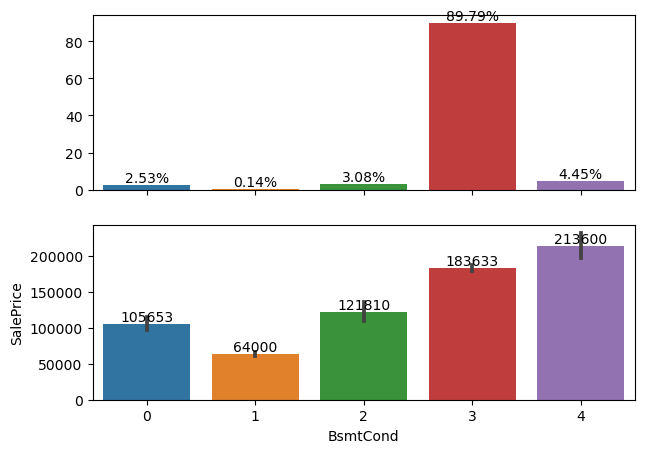

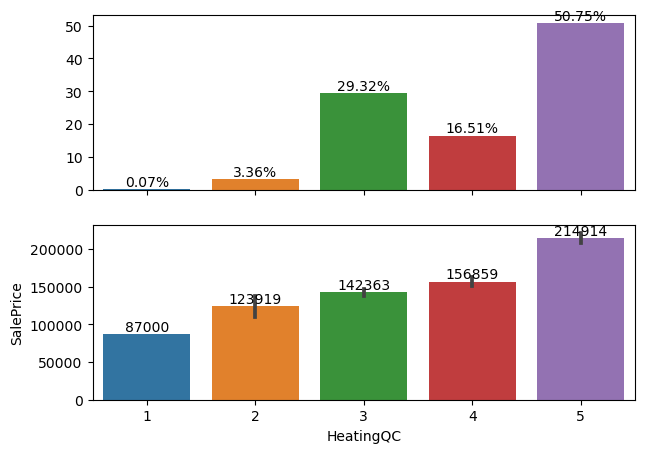

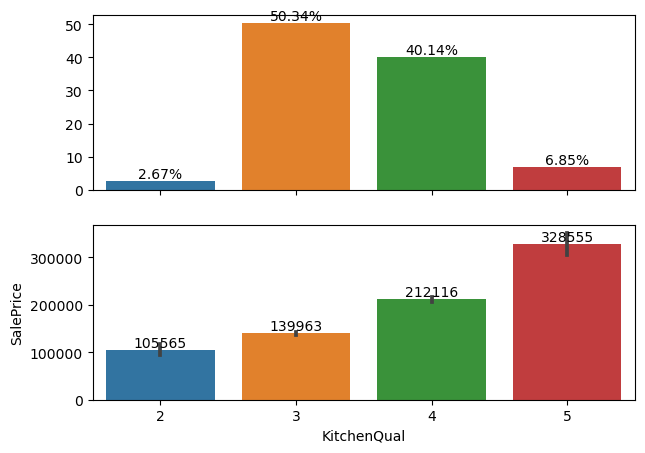

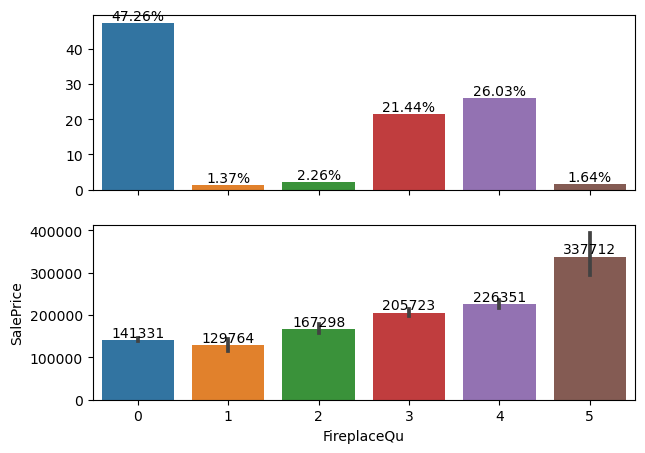

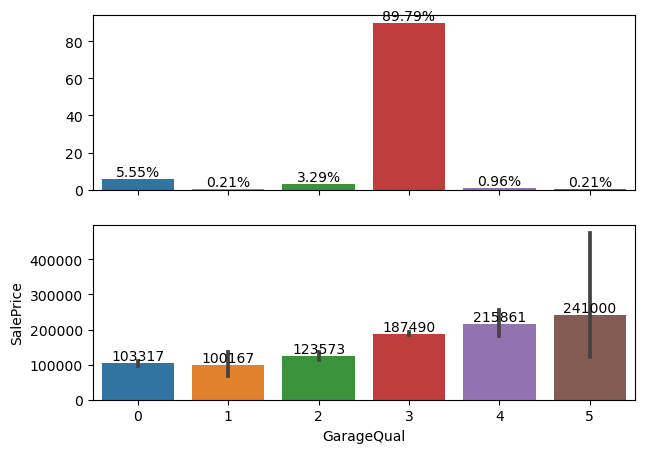

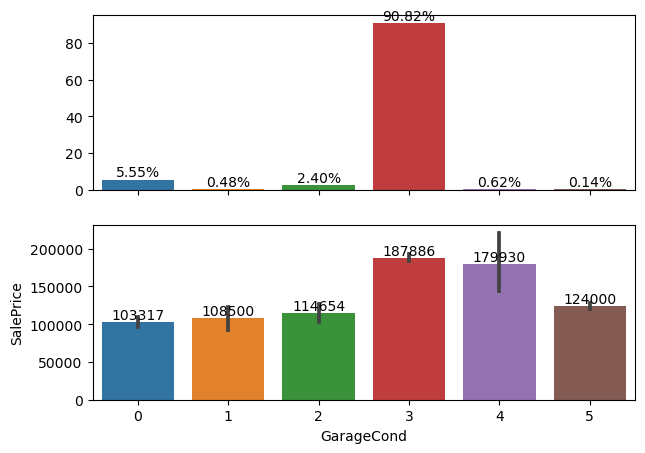

In [285]:
ordinal1 = ['ExterQual','ExterCond', 'BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']


for x in ordinal1:
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7, 5), sharex=True, sharey=False)

    status1 = data[x].value_counts().div(len(data)).mul(100)
    sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
    #axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
    #axes[0].set_ylabel("Count", fontsize = 15)
    #axes[0].set_xlabel("Loan Status", fontsize = 15)
    axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

    sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
    #axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
    #axes[1].set_ylabel("Percentage (%)", fontsize = 15)
    #axes[1].set_xlabel("Loan Status",fontsize = 15)
    axes[1].bar_label(axes[1].containers[0])

plt.show()

### 2.2 Combine different levels for categorical variables to linearize the relationship

In [286]:
data[['ExterCond']] = data[['ExterCond']].replace([1,2,3,4,5], [0,0,1,1,1])

In [287]:
data[['BsmtQual']] = data[['BsmtQual']].replace([0,1,2,3,4,5], [2,2,2,3,5,5])

In [288]:
data[['BsmtCond']] = data[['BsmtCond']].replace([0,1,2,3,4,5], [2,1,2,3,4,5])

In [289]:
data[['FireplaceQu']] = data[['FireplaceQu']].replace([0,1,2,3,4,5], [1,1,2,3,4,5])

In [290]:
data[['GarageQual']] = data[['GarageQual']].replace([0,1,2,3,4,5], [1,2,2,3,4,4])

In [291]:
data[['GarageCond']] = data[['GarageCond']].replace([0,1,2,3,4,5], [0,0,0,1,1,1])

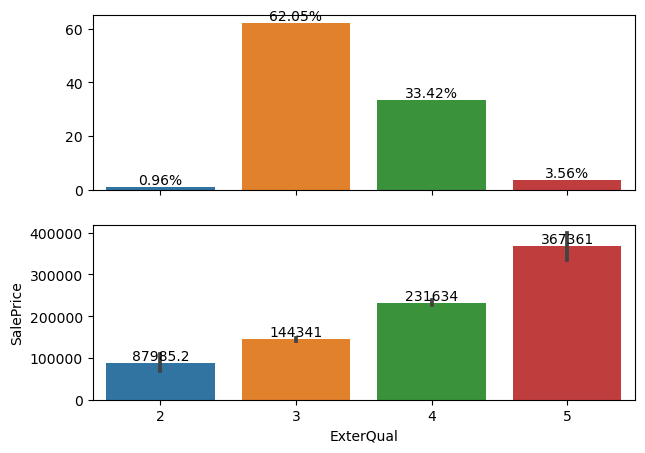

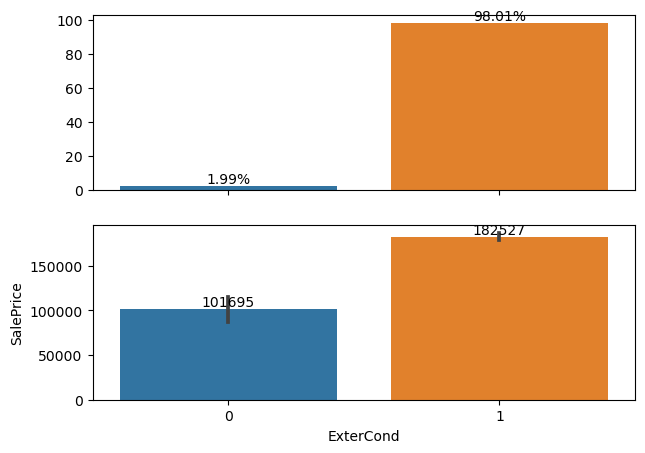

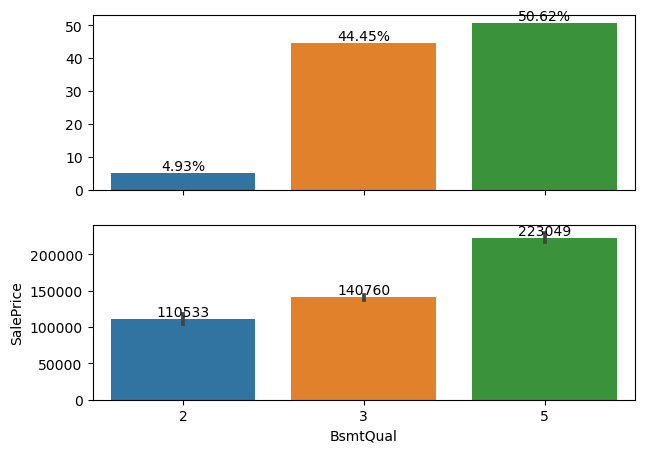

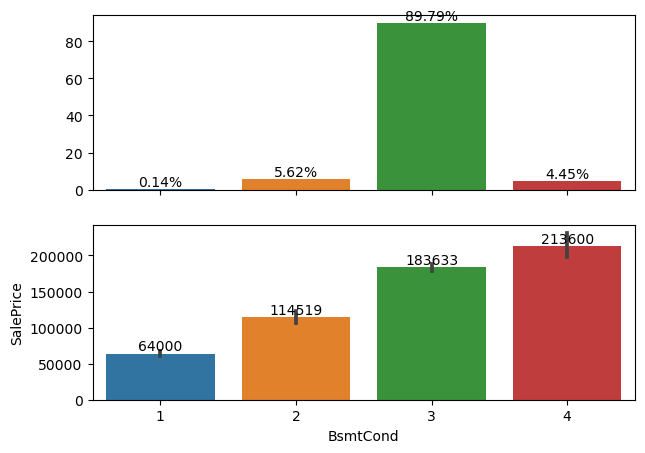

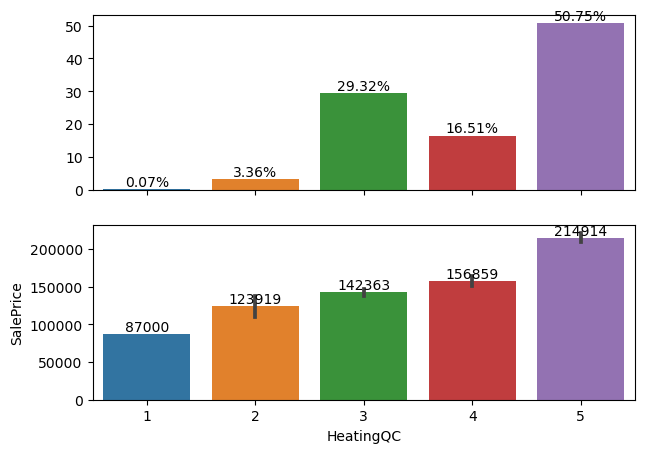

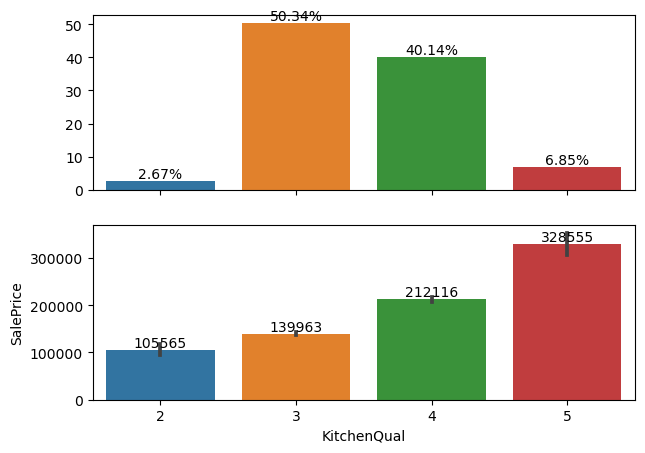

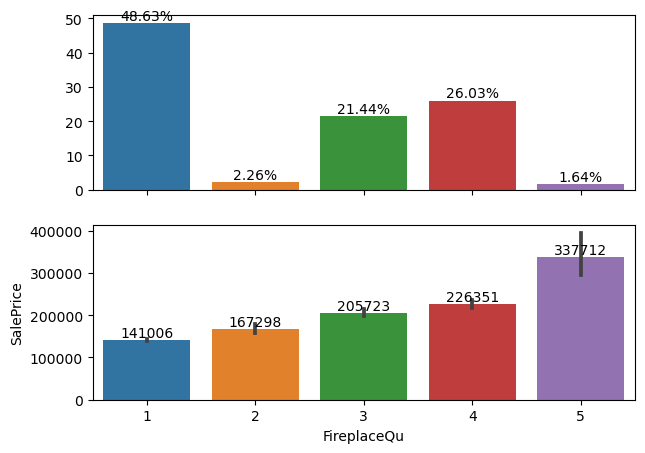

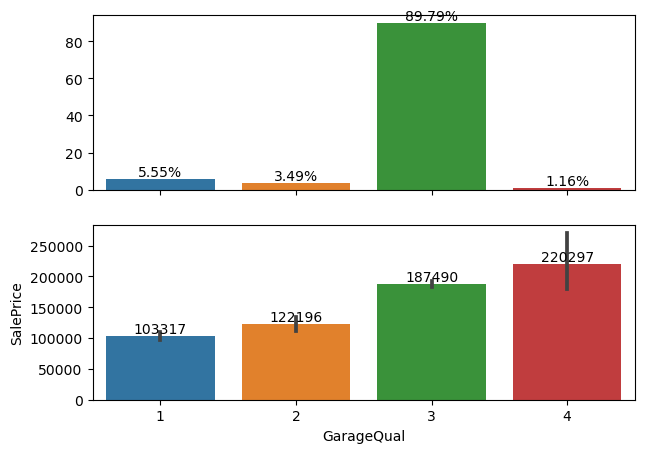

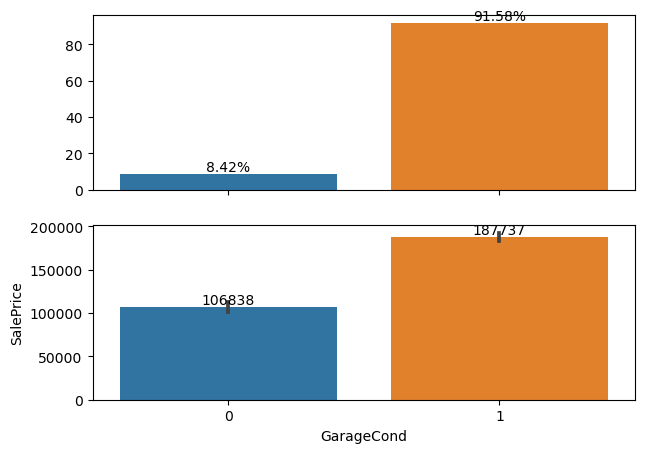

In [292]:
ordinal1 = ['ExterQual','ExterCond', 'BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']

for x in ordinal1:
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

    status1 = data[x].value_counts().div(len(data)).mul(100)
    sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
    #axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
    #axes[0].set_ylabel("Count", fontsize = 15)
    #axes[0].set_xlabel("Loan Status", fontsize = 15)
    axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

    sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
    #axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
    #axes[1].set_ylabel("Percentage (%)", fontsize = 15)
    #axes[1].set_xlabel("Loan Status",fontsize = 15)
    axes[1].bar_label(axes[1].containers[0])

plt.show()

In [293]:
data['CentralAir'] = data['CentralAir'].replace(["Y","N"],[1, 0])

In [294]:
ordinal2 = ['BsmtFinType1','BsmtFinType2']
data[ordinal2] = data[ordinal2].replace(['No Value', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [0,1,2,3,4,5,6])

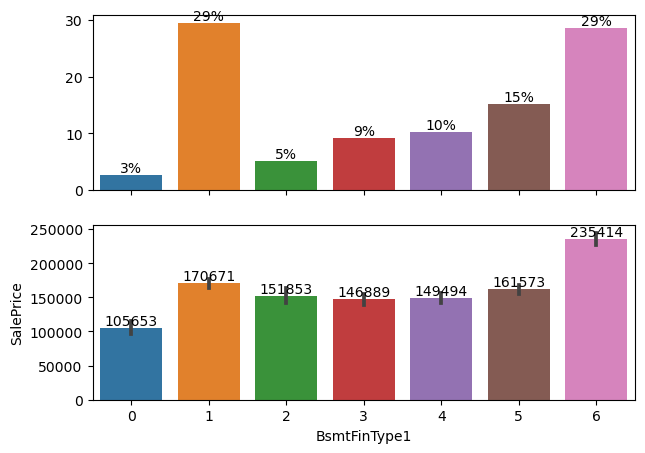

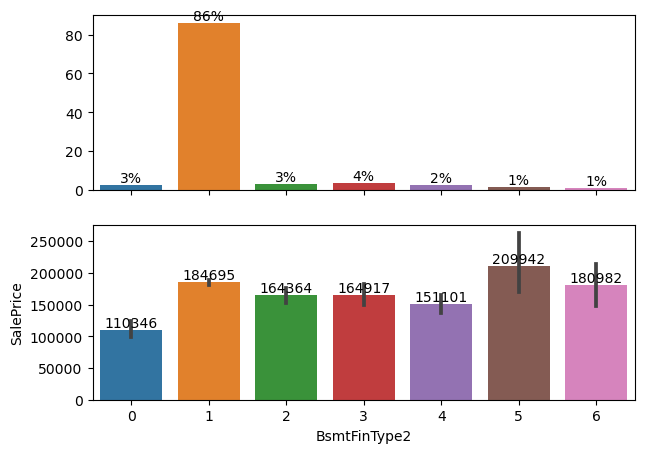

In [295]:
missing = ['BsmtFinType1','BsmtFinType2']


for x in missing:
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7, 5), sharex=True, sharey=False)

    status1 = data[x].value_counts().div(len(data)).mul(100)
    sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
    #axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
    #axes[0].set_ylabel("Count", fontsize = 15)
    #axes[0].set_xlabel("Loan Status", fontsize = 15)
    axes[0].bar_label(axes[0].containers[0],fmt='%.f%%')

    sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
    #axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
    #axes[1].set_ylabel("Percentage (%)", fontsize = 15)
    #axes[1].set_xlabel("Loan Status",fontsize = 15)
    axes[1].bar_label(axes[1].containers[0])

plt.show()

In [296]:
data[['BsmtFinType1']] = data[['BsmtFinType1']].replace([0,1,2,3,4,5,6], [1,2,2,2,2,2,3])

In [297]:
data[['BsmtFinType2']] = data[['BsmtFinType2']].replace([0,1,2,3,4,5,6], [0,1,1,1,1,1,1])

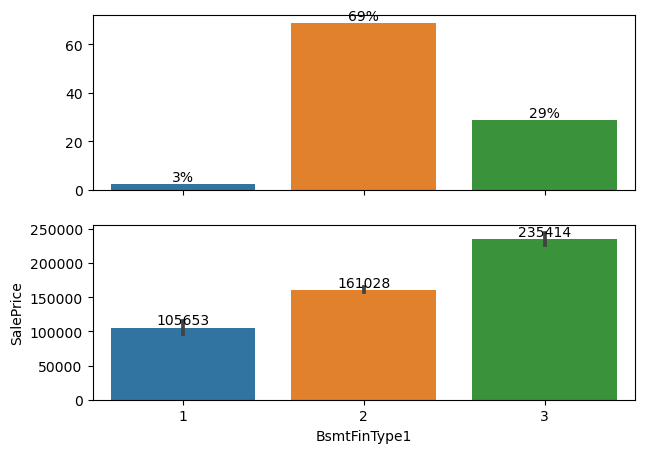

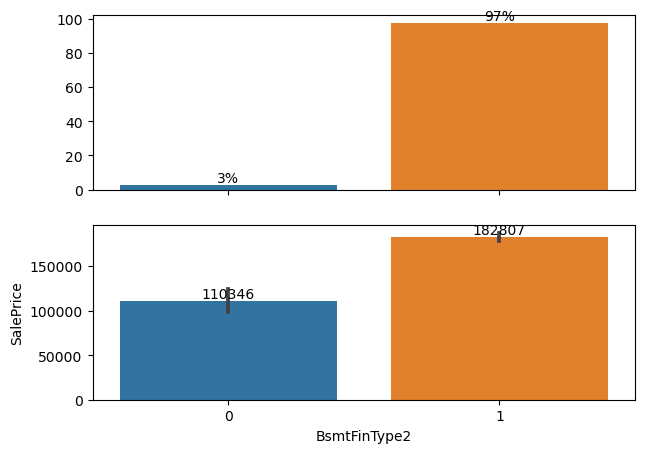

In [298]:
missing = ['BsmtFinType1','BsmtFinType2']


for x in missing:
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7, 5), sharex=True, sharey=False)

    status1 = data[x].value_counts().div(len(data)).mul(100)
    sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
    #axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
    #axes[0].set_ylabel("Count", fontsize = 15)
    #axes[0].set_xlabel("Loan Status", fontsize = 15)
    axes[0].bar_label(axes[0].containers[0],fmt='%.f%%')

    sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
    #axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
    #axes[1].set_ylabel("Percentage (%)", fontsize = 15)
    #axes[1].set_xlabel("Loan Status",fontsize = 15)
    axes[1].bar_label(axes[1].containers[0])

plt.show()

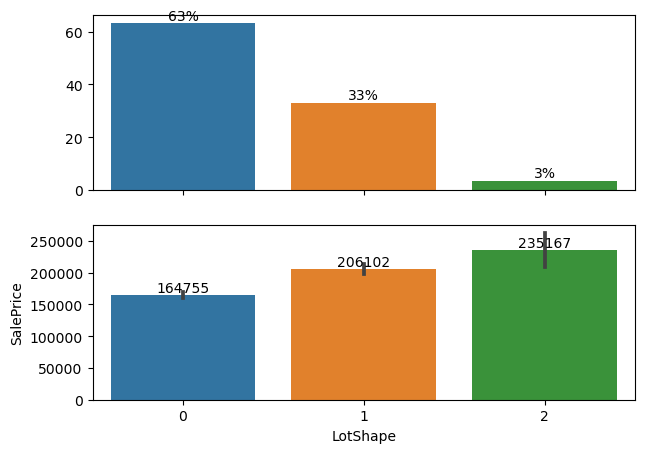

In [299]:
data['LotShape'] = data['LotShape'].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0,1,2,3])
data['LotShape'] = data['LotShape'].replace([0,1,2,3], [0,1,2,2])

x = 'LotShape'
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7, 5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

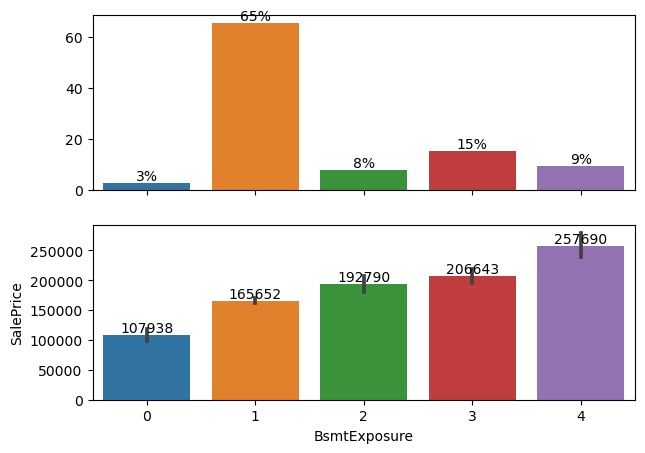

In [300]:
data['BsmtExposure'] = data['BsmtExposure'].replace(['No Value', 'No', 'Mn', 'Av', 'Gd'], [0,1,2,3,4])

x = 'BsmtExposure'

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

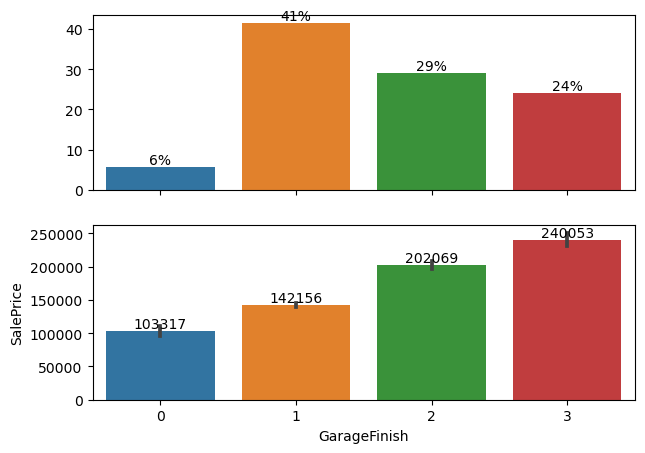

In [301]:
data['GarageFinish'] = data['GarageFinish'].replace(['No Value', 'Unf', 'RFn', 'Fin'], [0,1,2,3])

x = 'GarageFinish'

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

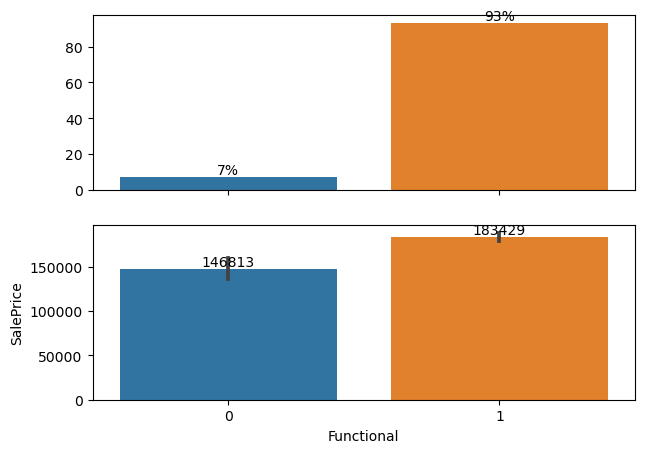

In [302]:
data['Functional'] = data['Functional'].replace(["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], [0,1,2,3,4,5,6,7])
data['Functional'] = data['Functional'].replace([0,1,2,3,4,5,6,7], [0,0,0,0,0,0,0,1])
x = 'Functional'

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

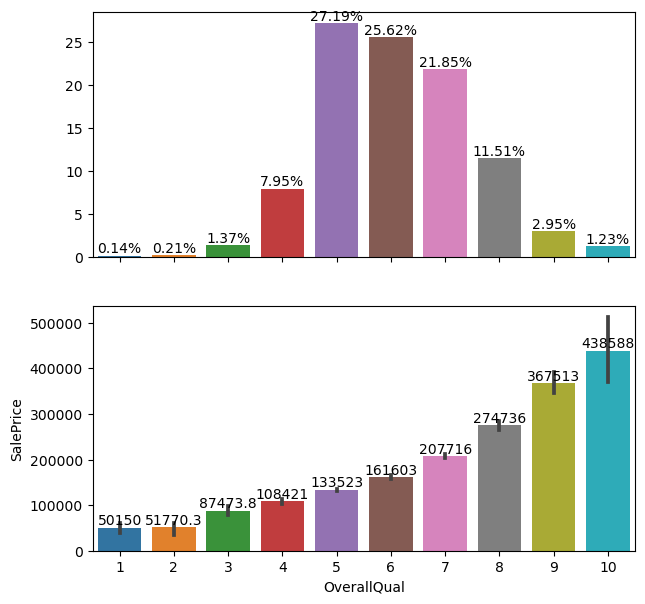

In [303]:
x = 'OverallQual'

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7, 7), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

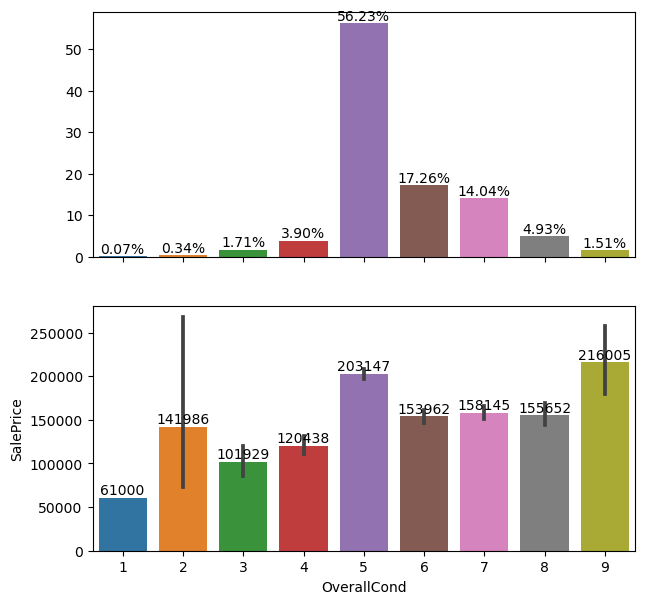

In [304]:
#data['OverallQual'] = data['OverallQual'].replace([1,2,3,4,5,6,7,8,9,10], [0,0,0,0,0,0,0,1])
x = 'OverallCond'

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,7), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

In [305]:
# it can be seen that not much variation in 'Street', 'Utilities', 'Condition2' and hence can be dropped
data.drop(['Street','Utilities','Condition2'], axis = 1, inplace = True)

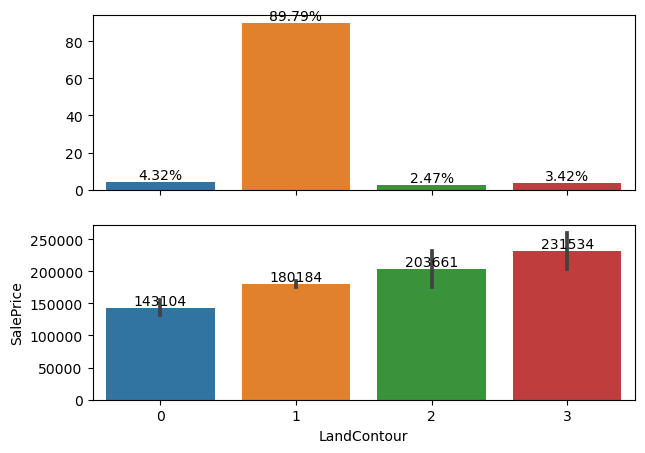

In [306]:
data['LandContour'] = data['LandContour'].replace(["Bnk", "Lvl", "Low", "HLS"], [0,1,2,3])
x = 'LandContour'

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

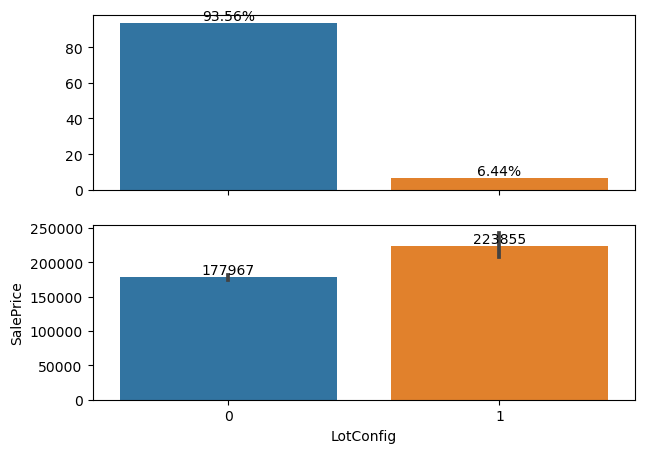

In [307]:
x = 'LotConfig'
data['LotConfig'] = data['LotConfig'].replace(["FR2","Corner","FR3","Inside","CulDSac"],[0,0,0,0,1])
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

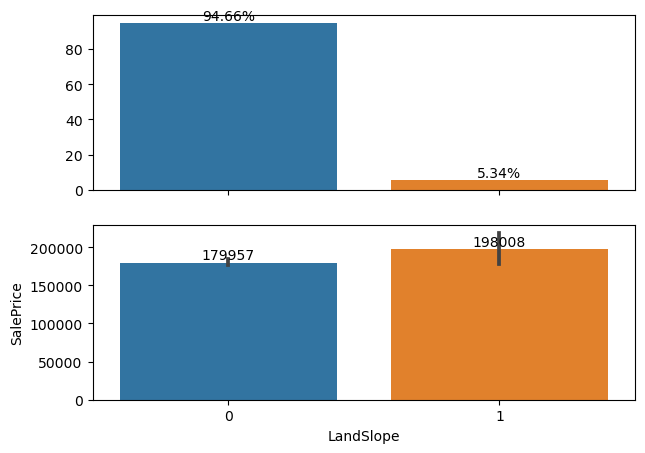

In [308]:
x = 'LandSlope'
data['LandSlope'] = data['LandSlope'].replace(["Gtl","Mod","Sev"],[0,1,1])
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

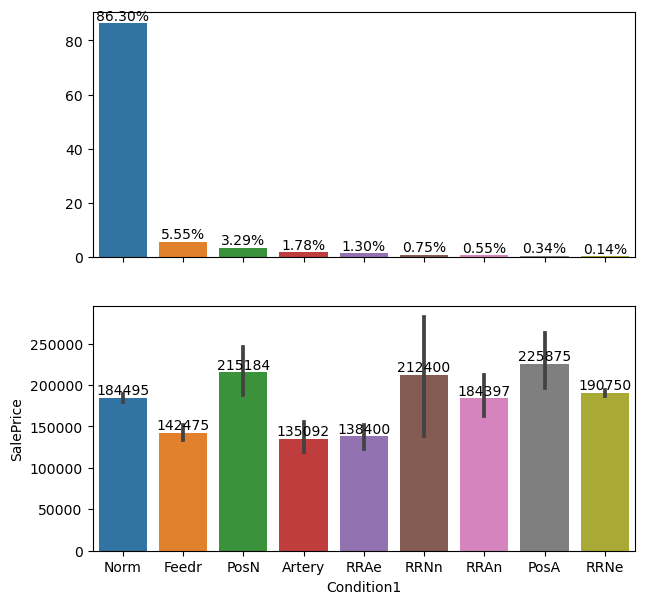

In [309]:
x = 'Condition1'
#data['LandSlope'] = data['LandSlope'].replace(["Gtl","Mod","Sev"],[0,1,1])

      
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,7), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

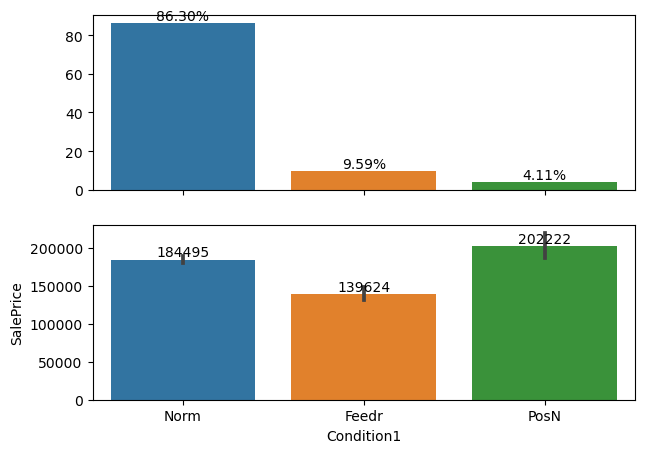

In [310]:
x = 'Condition1'
data['Condition1'] = data['Condition1'].replace(["Artery", "Feedr", "Norm", "RRNn", "RRAn", "PosN", "PosA", "RRNe", "RRAe"],
                                                ["Feedr", "Feedr", "Norm", "PosN", "PosN", "PosN", "PosN", "PosN", "Feedr"])

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

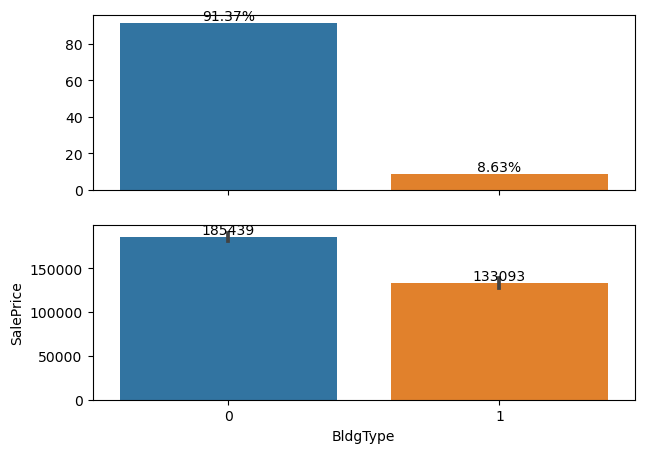

In [311]:
x = 'BldgType'
data['BldgType'] = data['BldgType'].replace(["1Fam","2fmCon","Duplex","TwnhsE","Twnhs"],[0, 1, 1, 0, 1])

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

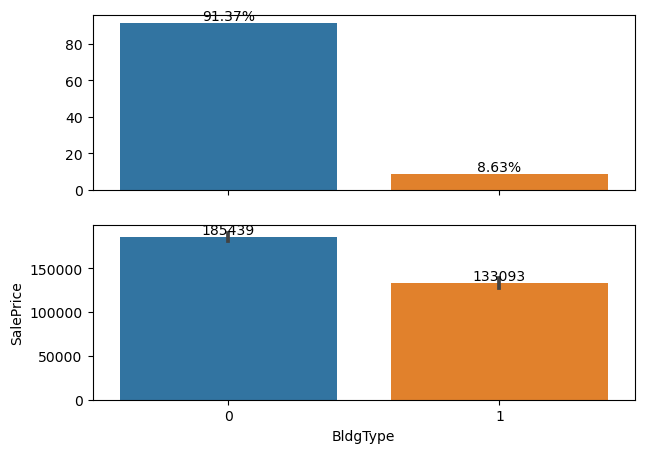

In [312]:
x = 'BldgType'
data['BldgType'] = data['BldgType'].replace(["1Fam","2fmCon","Duplex","TwnhsE","Twnhs"],[0, 1, 1, 0, 1])

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

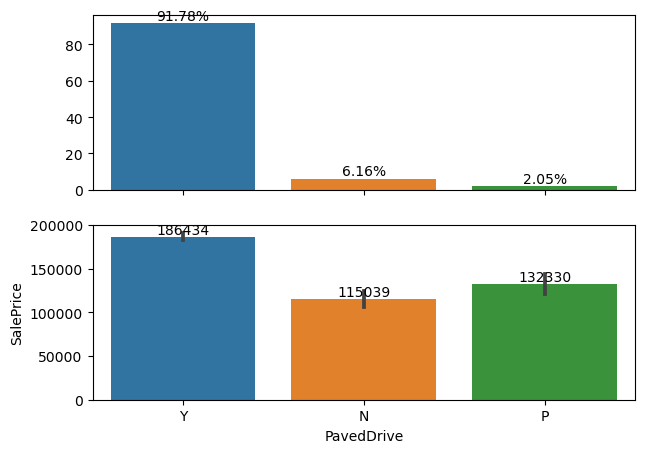

In [313]:
x = 'PavedDrive'

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(7,5), sharex=True, sharey=False)

status1 = data[x].value_counts().div(len(data)).mul(100)
sns.barplot(ax=axes[0], x=status1.index, y=status1.values)
#axes[0].set_title("Distribution of a target variable by count", fontsize = 15)
#axes[0].set_ylabel("Count", fontsize = 15)
#axes[0].set_xlabel("Loan Status", fontsize = 15)
axes[0].bar_label(axes[0].containers[0],fmt='%.2f%%')

sns.barplot(ax=axes[1], x=data[x], y=data.SalePrice)
#axes[1].set_title("Distribution of a target variable by %", fontsize = 15)
#axes[1].set_ylabel("Percentage (%)", fontsize = 15)
#axes[1].set_xlabel("Loan Status",fontsize = 15)
axes[1].bar_label(axes[1].containers[0])

plt.show()

In [314]:
# converting MSSubClass to categorical
data['MSSubClass'] = data['MSSubClass'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   LotConfig      1460 non-null   int64  
 7   LandSlope      1460 non-null   int64  
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   int64  
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  RoofMatl       1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

## 3. Exploratory Data Analysis

In [315]:
categorical = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 
               'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition', 'MoSold', 'YrSold']

numeric = ['SalePrice','LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 
           'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 
           'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
           'HouseAge', 'RemodAge', 'GarageAge','Fireplace','LotFrontage_d','Garage','Bsmnt','CentralAir']

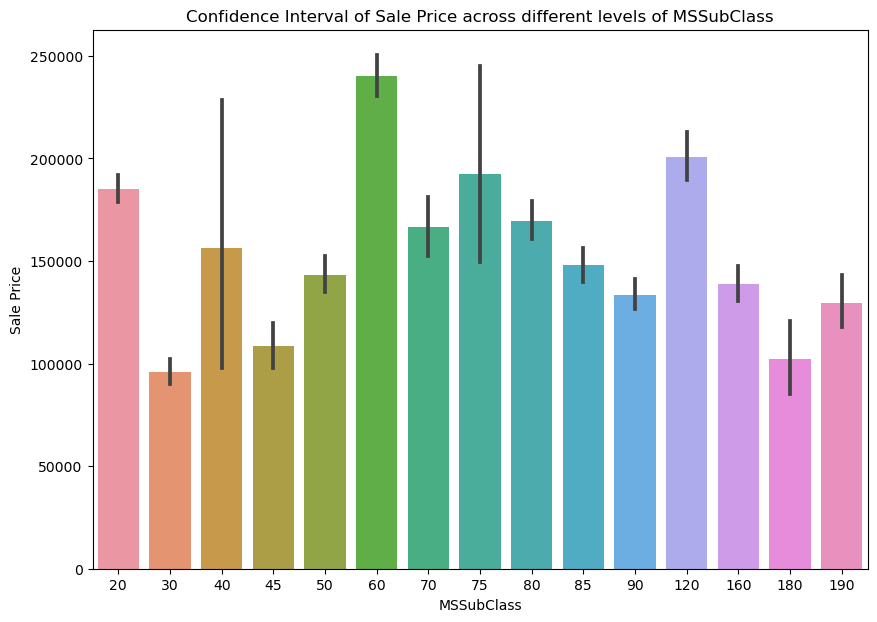

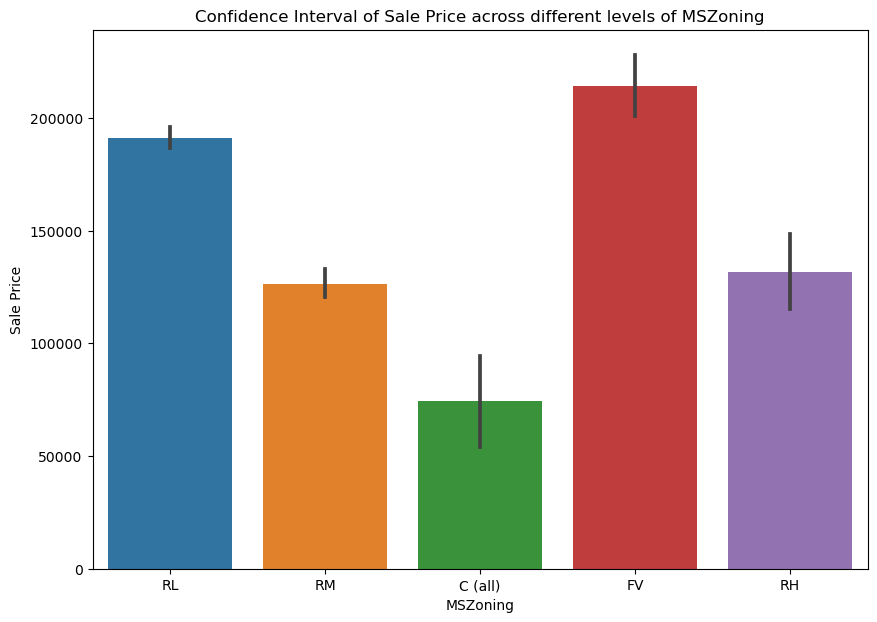

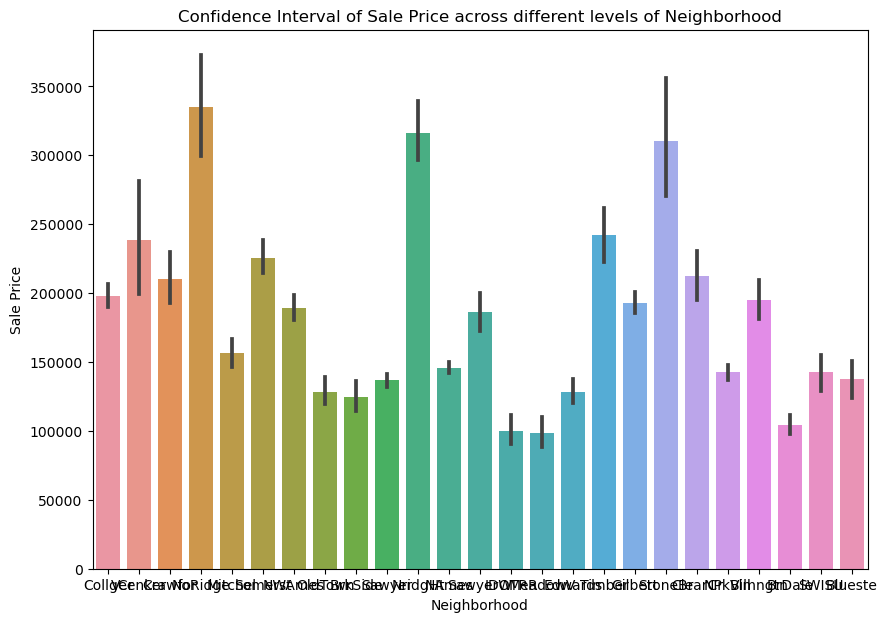

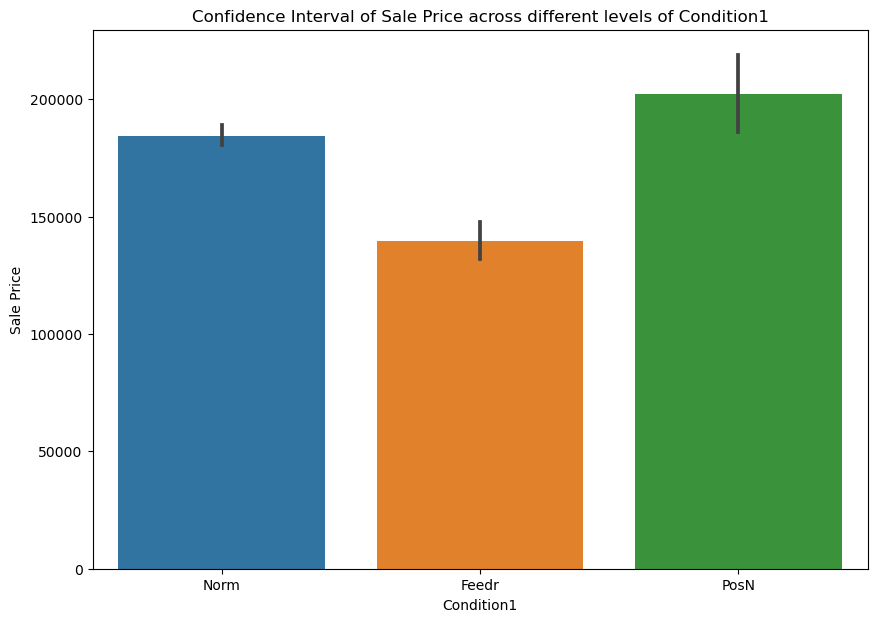

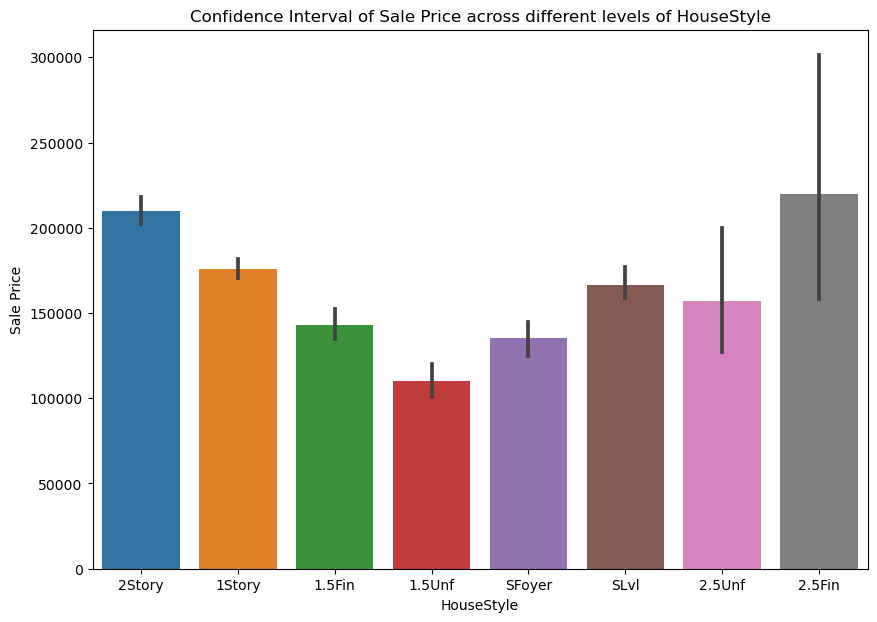

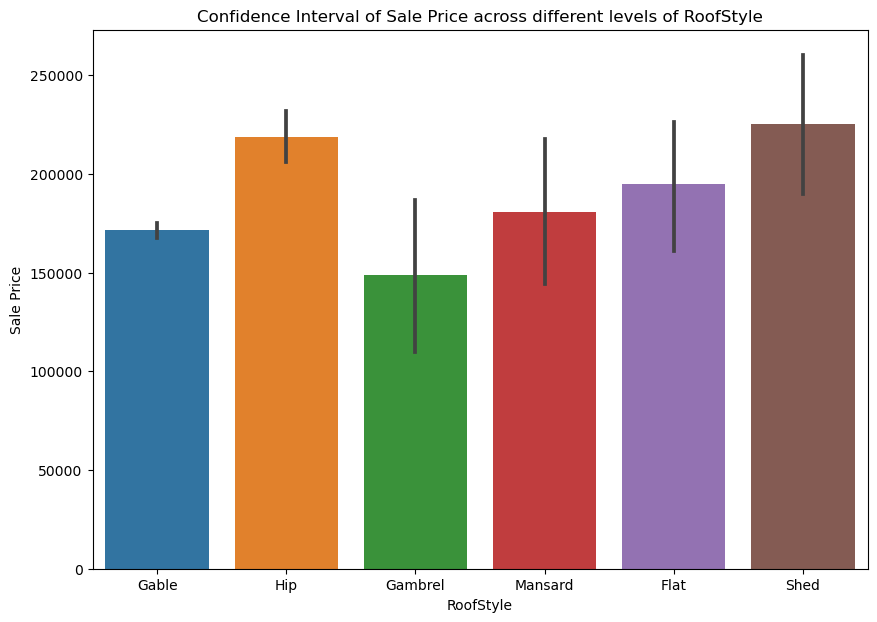

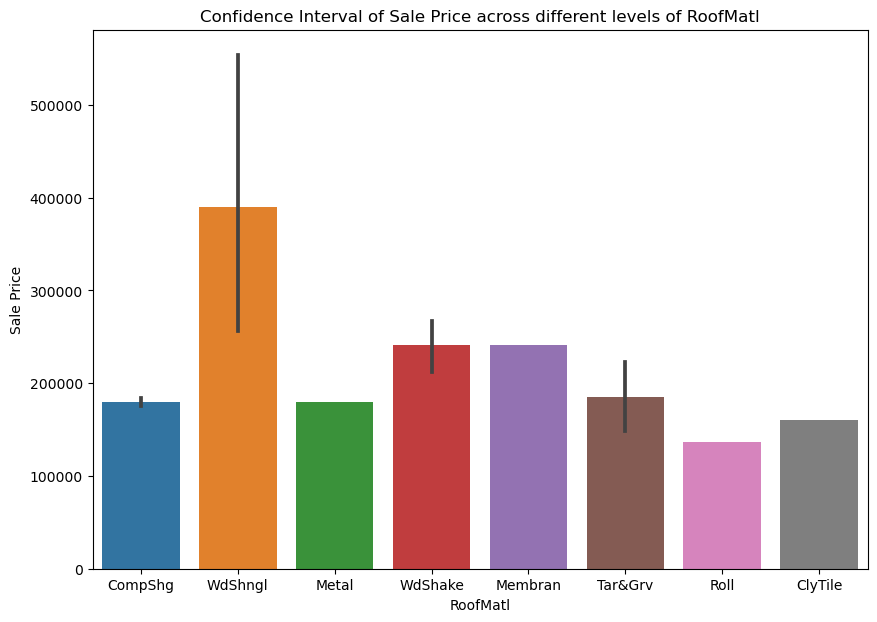

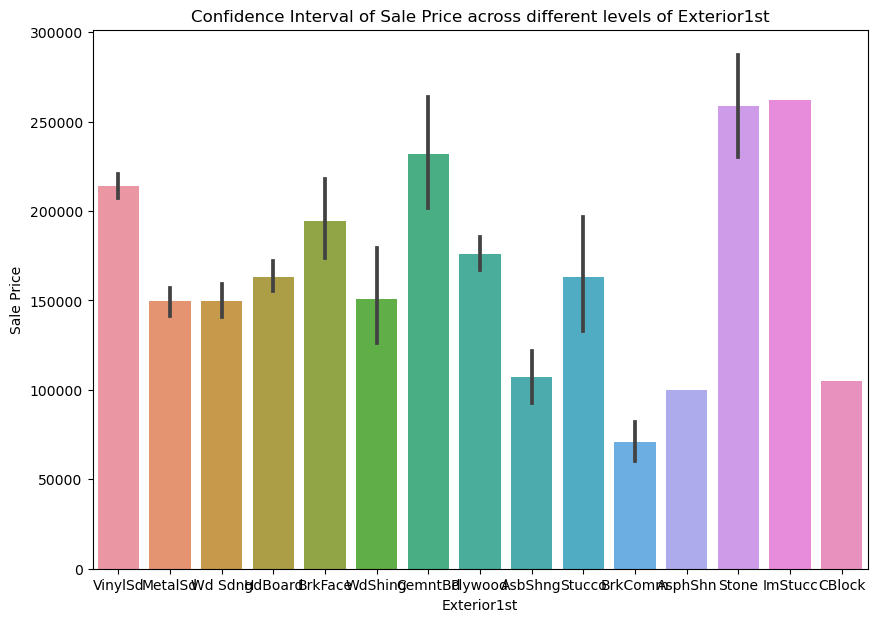

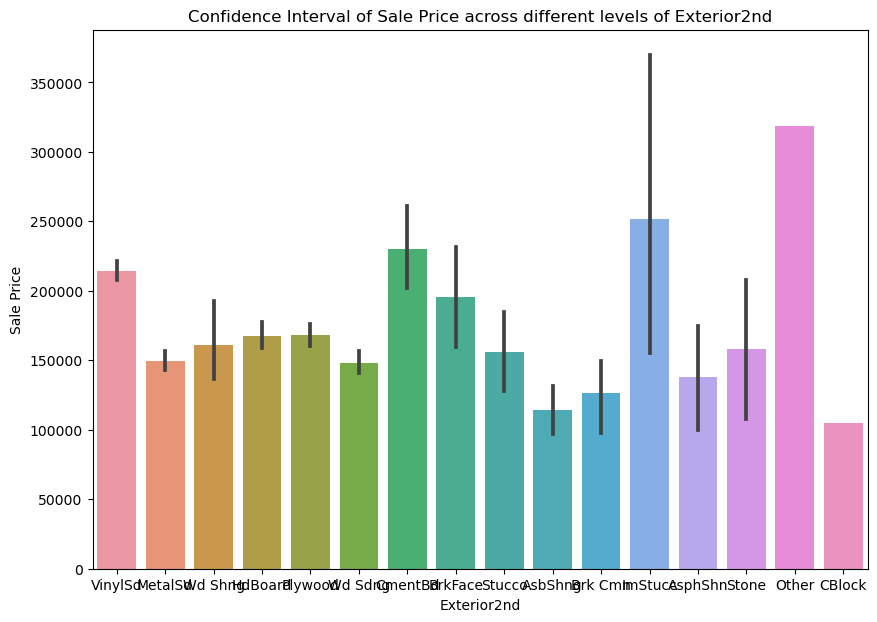

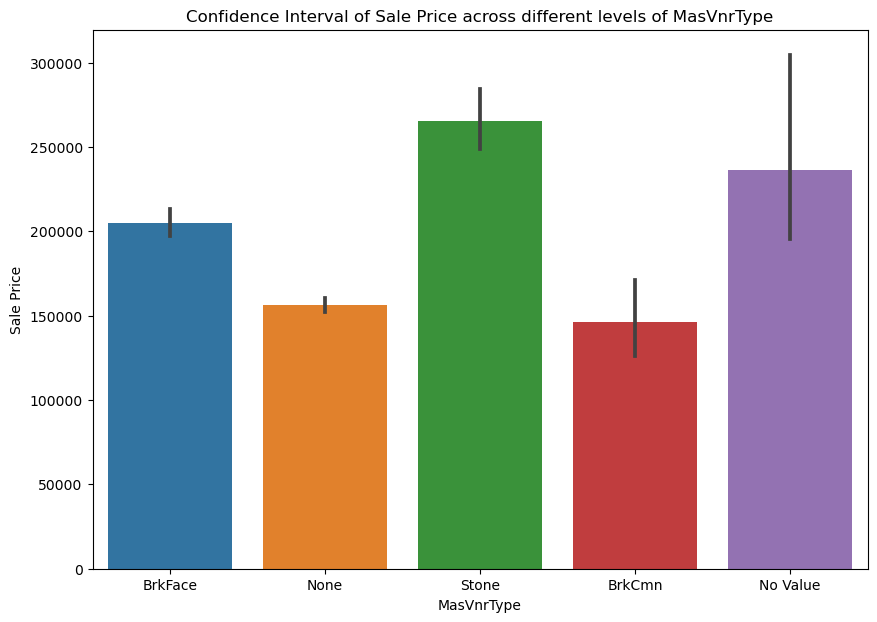

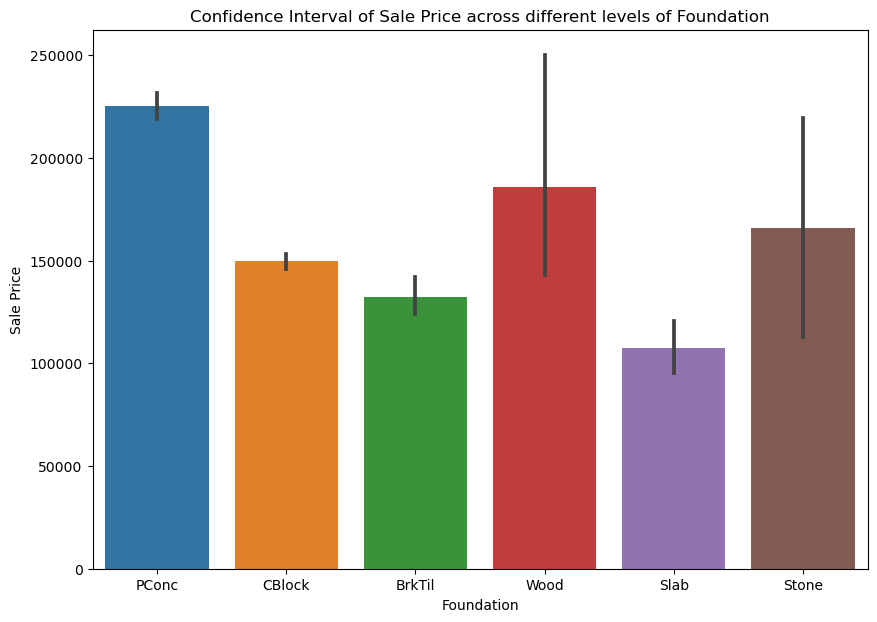

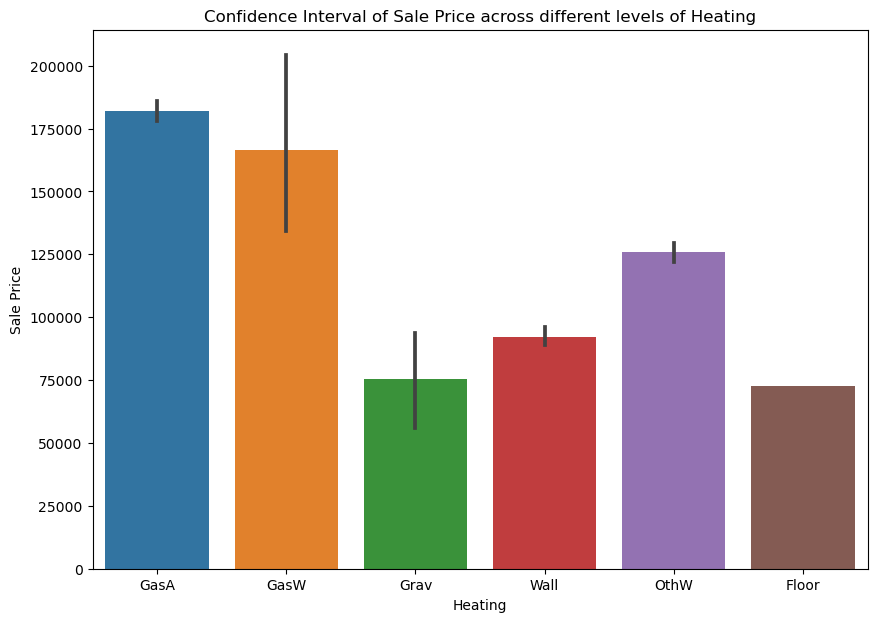

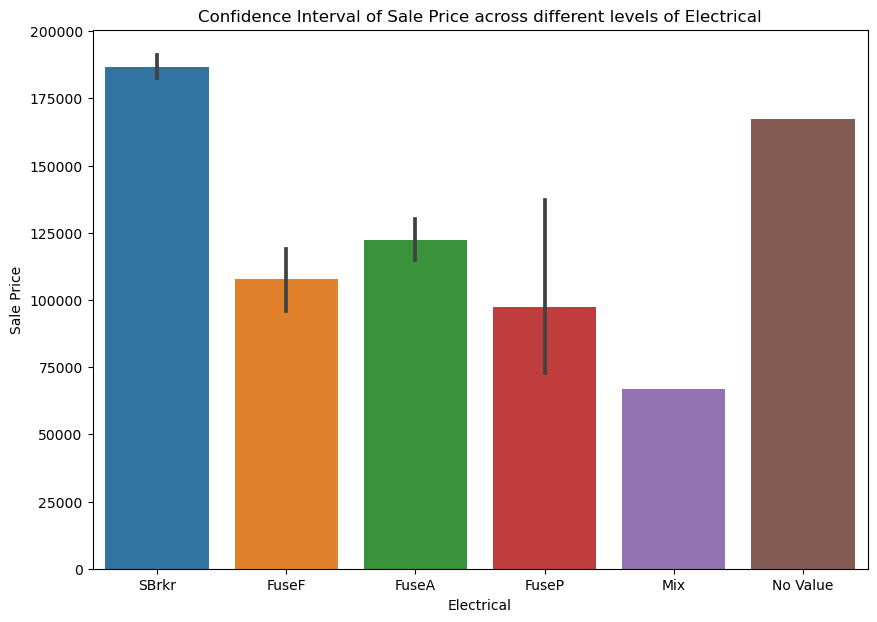

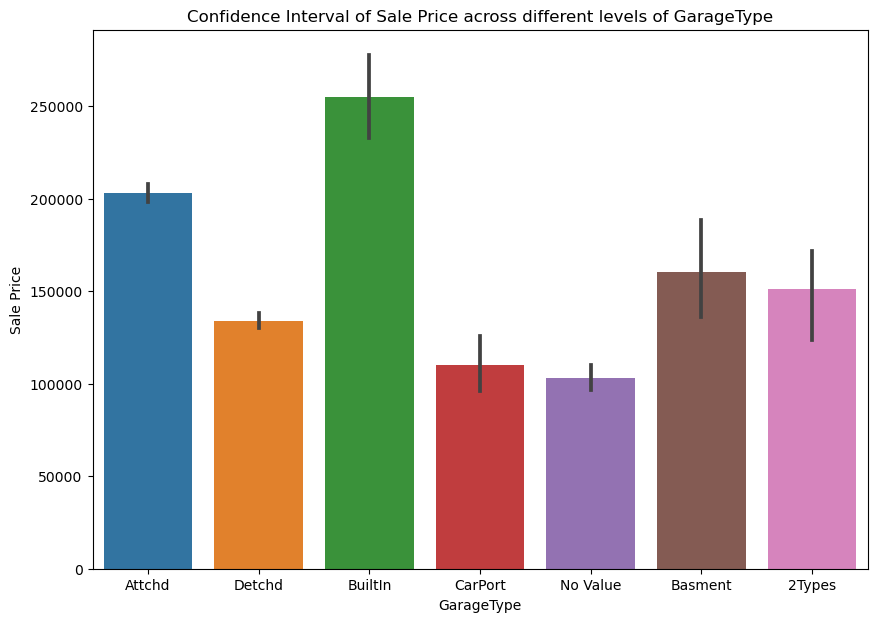

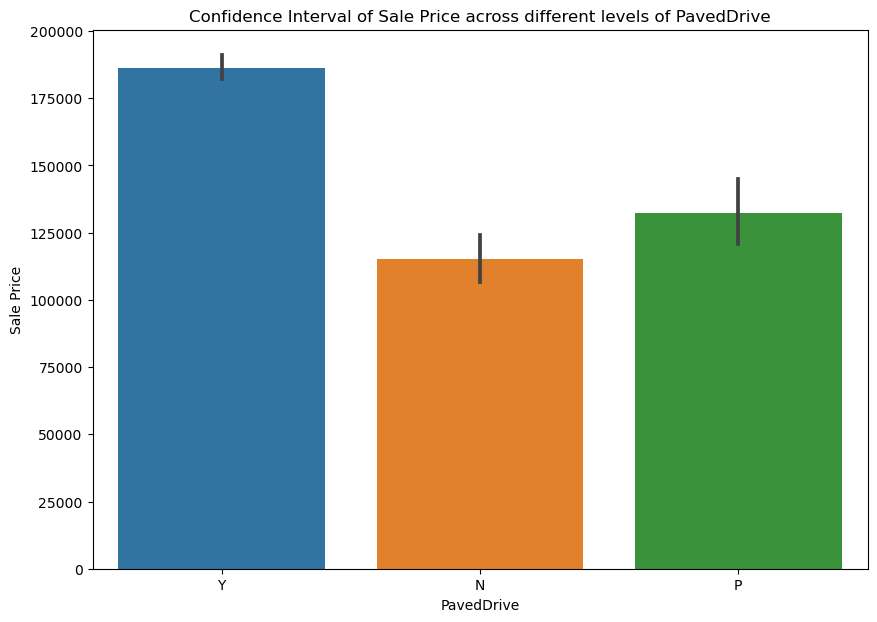

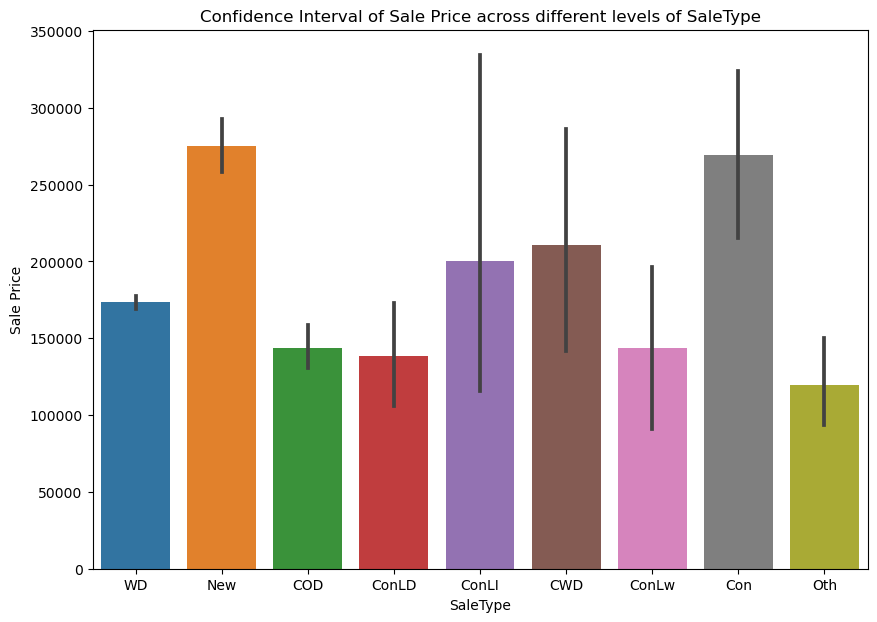

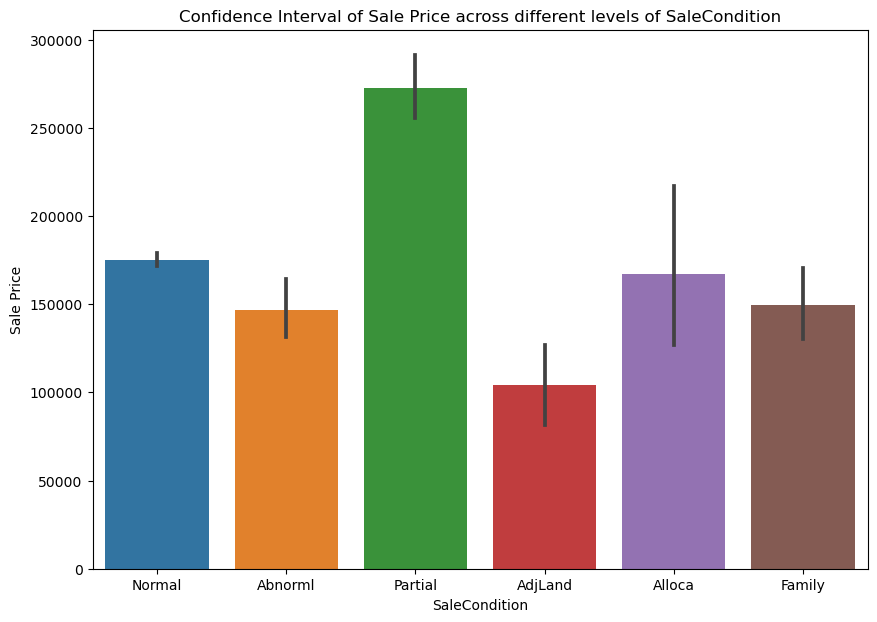

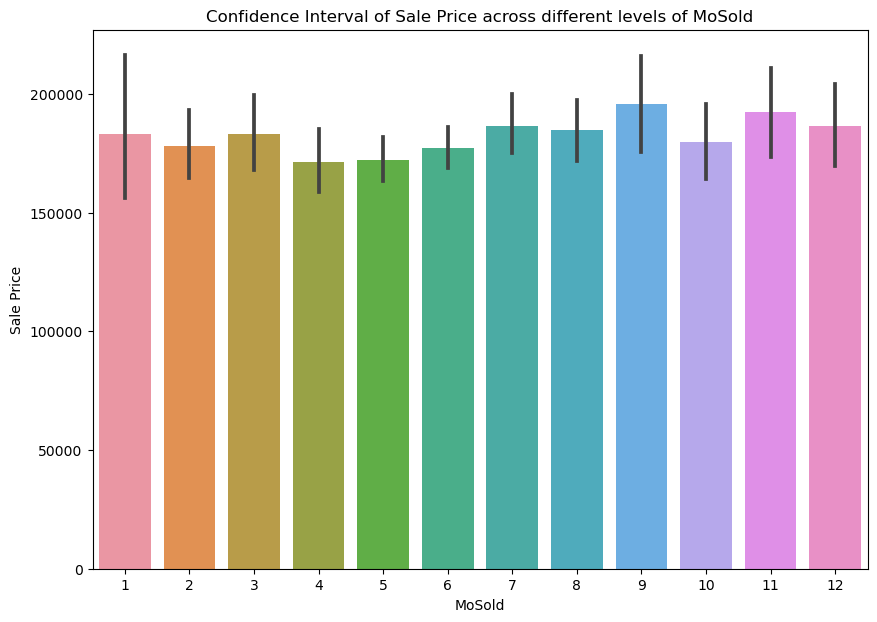

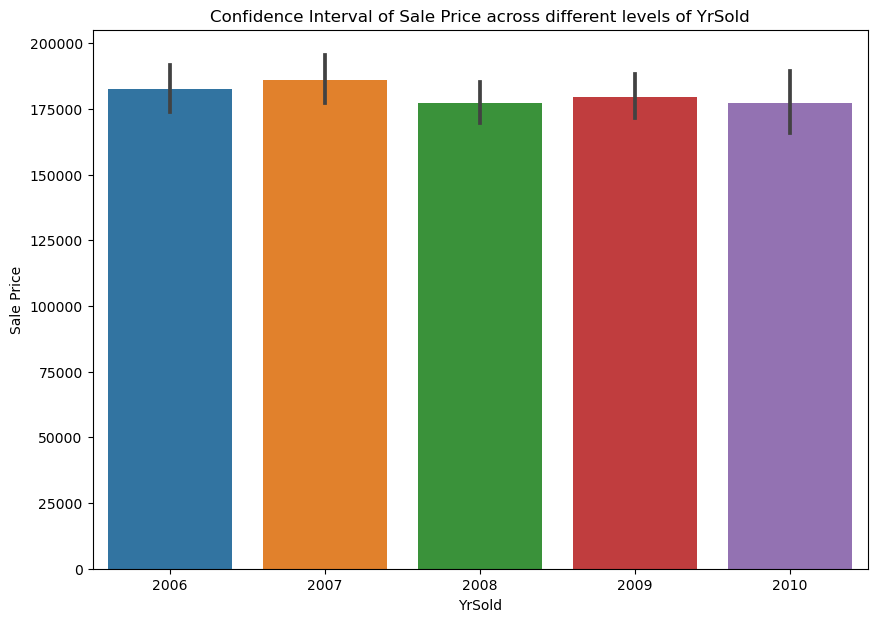

In [316]:
for x in categorical:
    plt.figure(figsize=(10,7))
    sns.barplot(x=data[x], y=data.SalePrice)
    plt.title("Confidence Interval of Sale Price across different levels of "+x)
    plt.ylabel("Sale Price")
    plt.xlabel(x)
    plt.show()

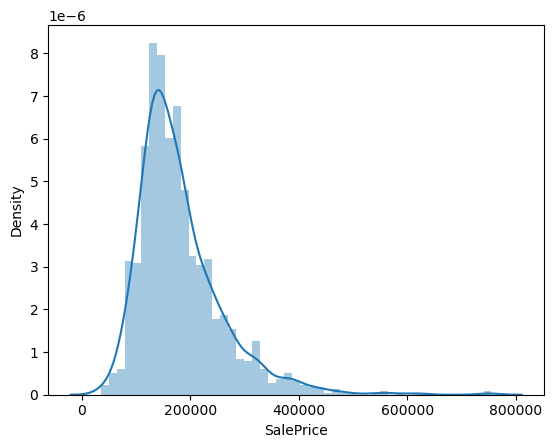

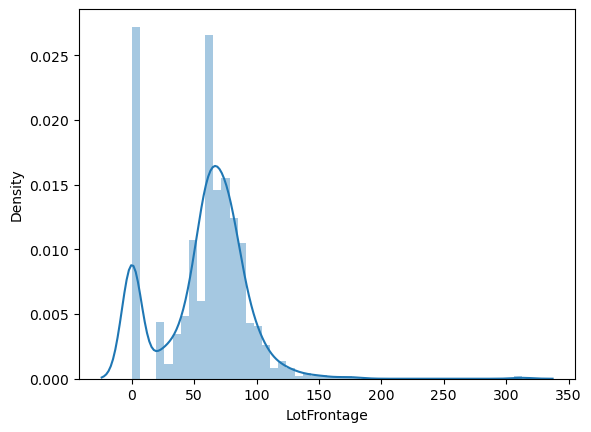

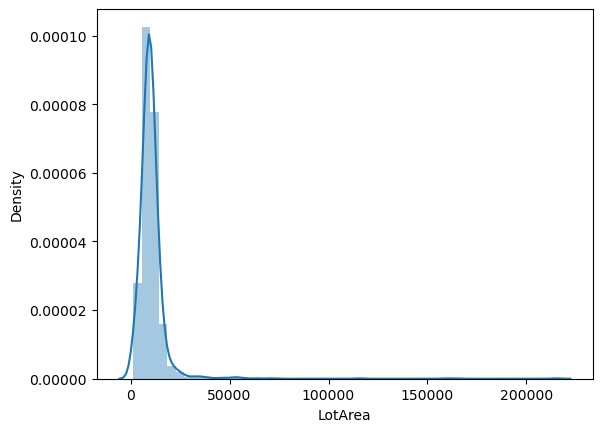

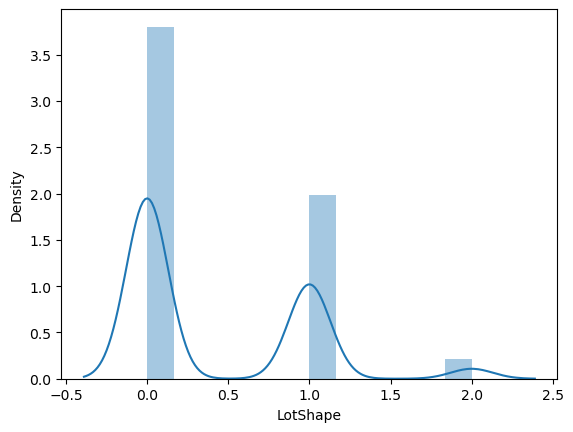

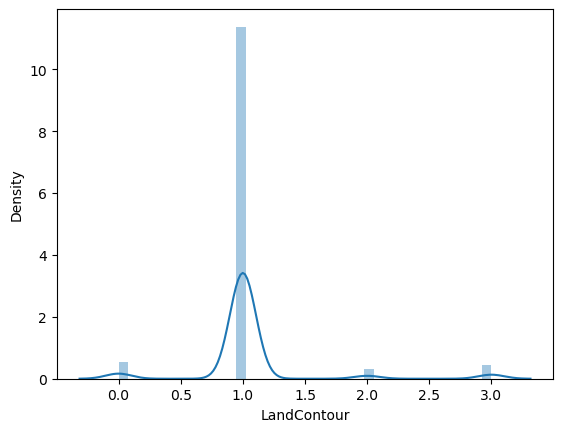

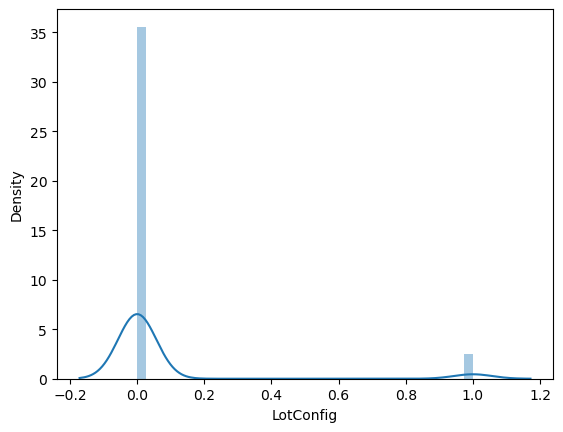

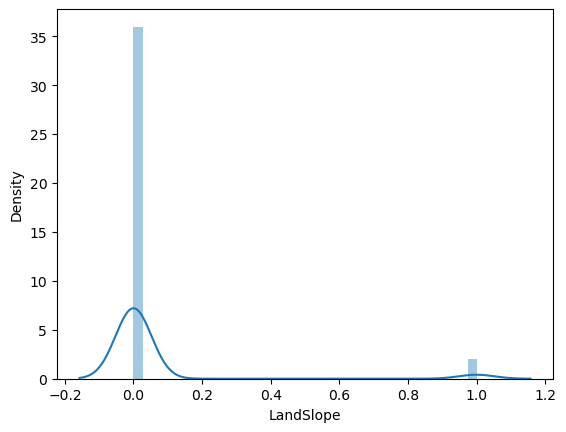

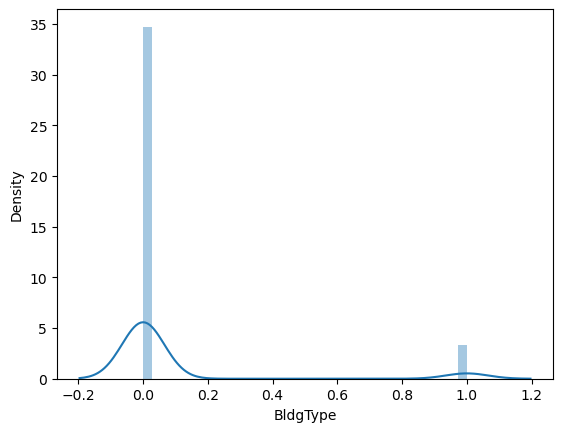

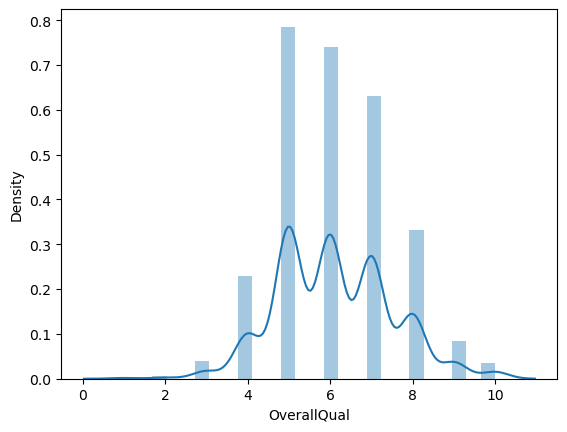

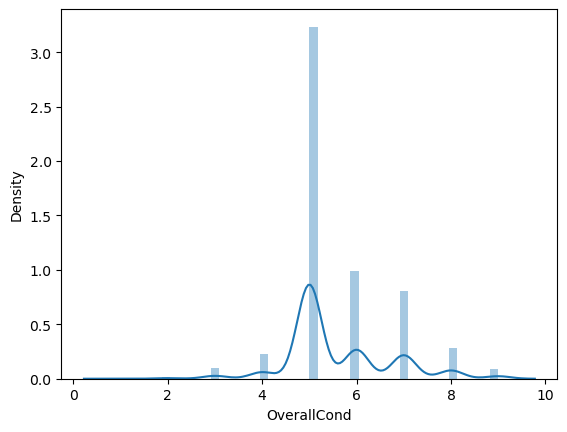

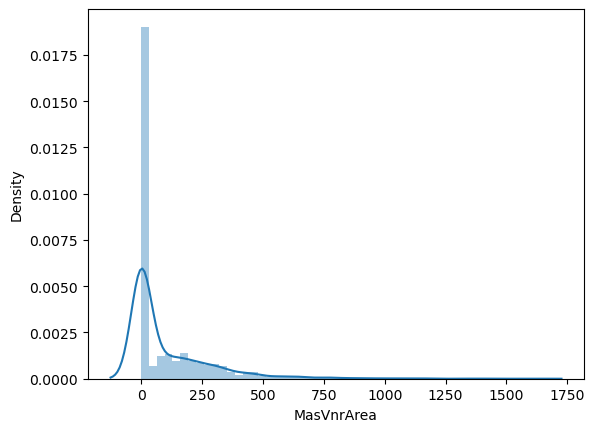

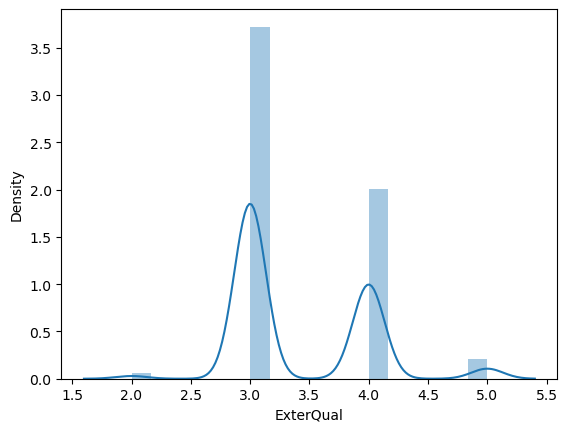

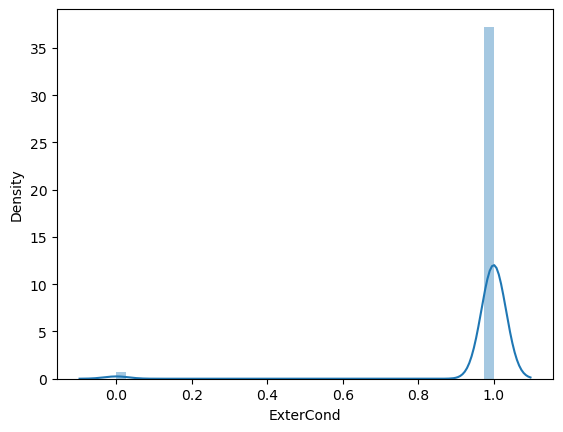

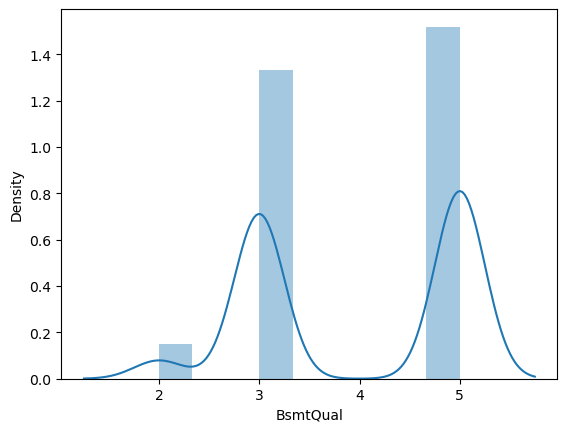

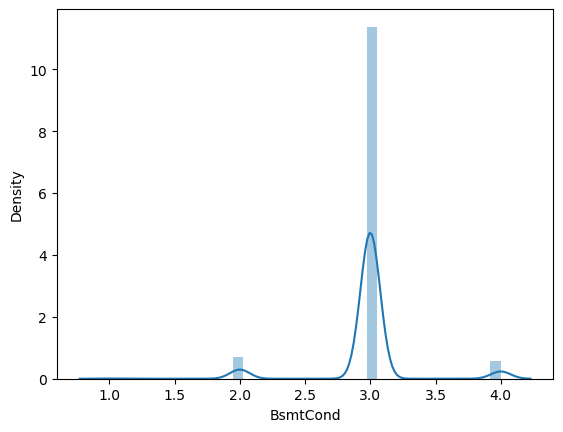

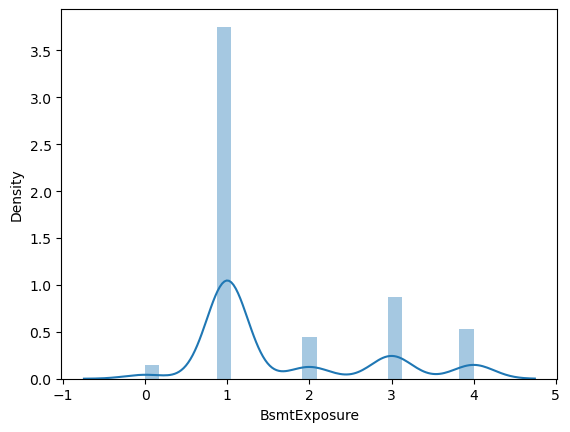

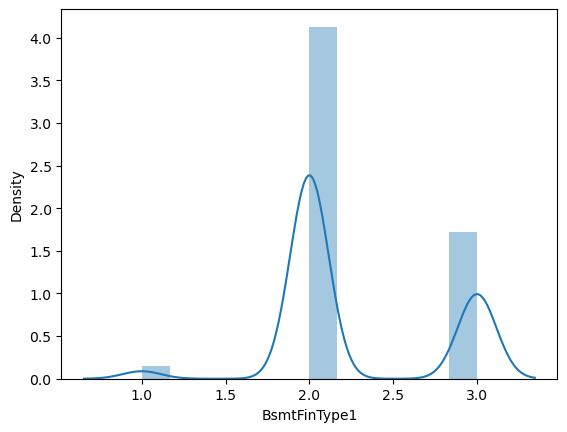

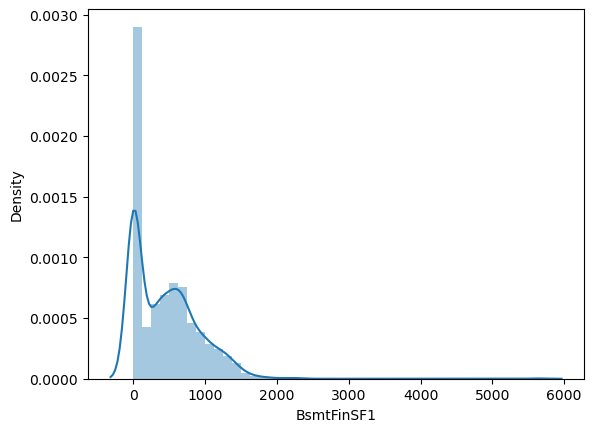

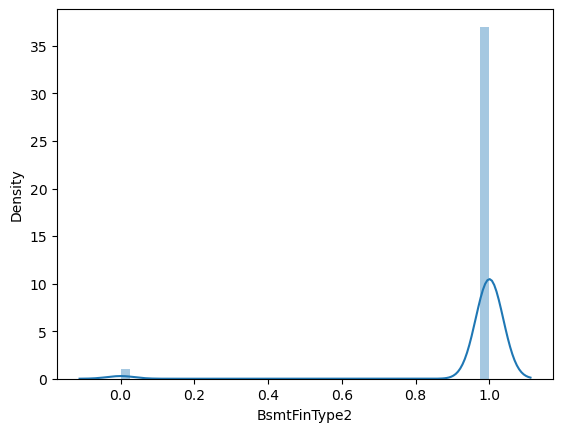

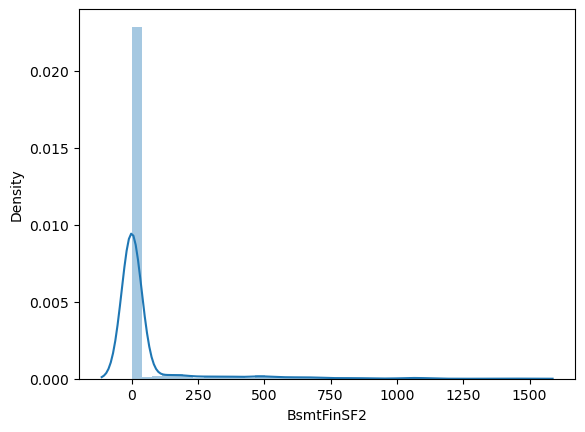

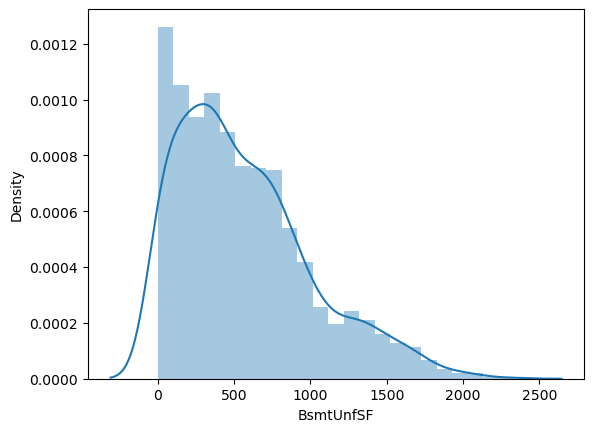

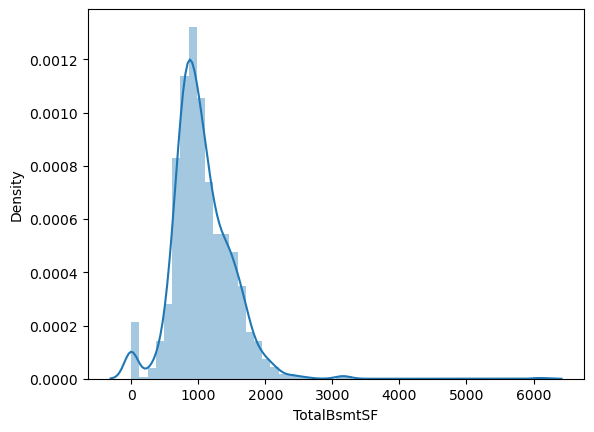

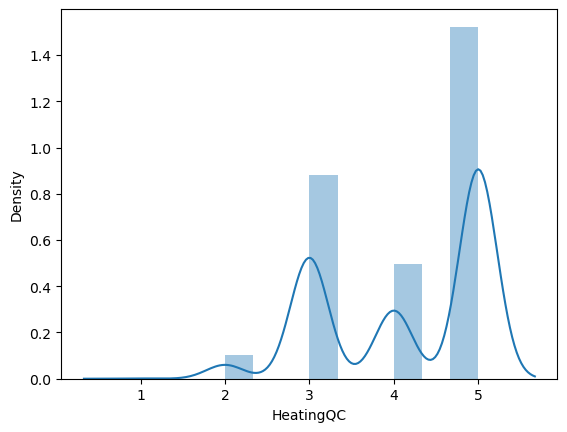

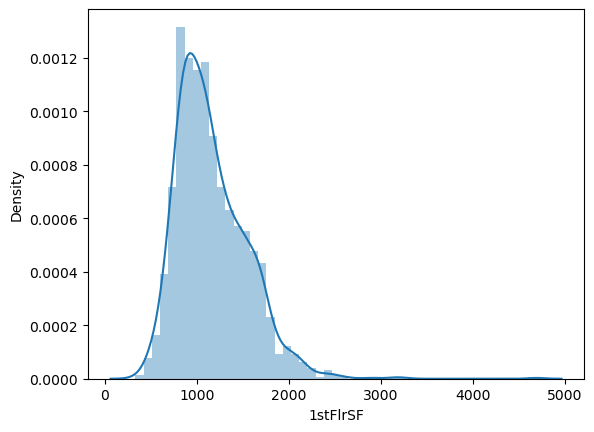

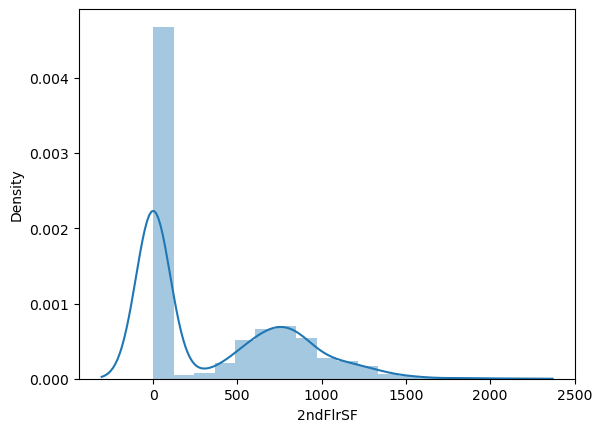

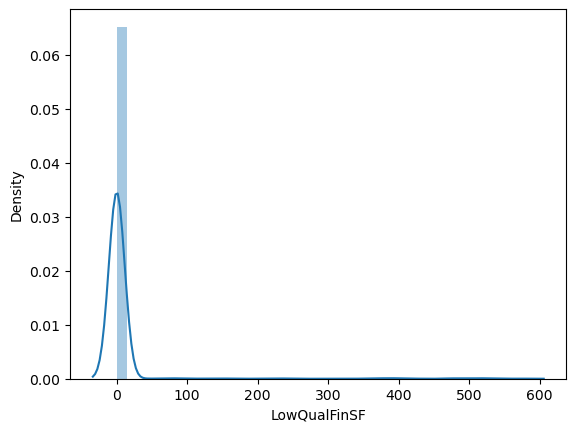

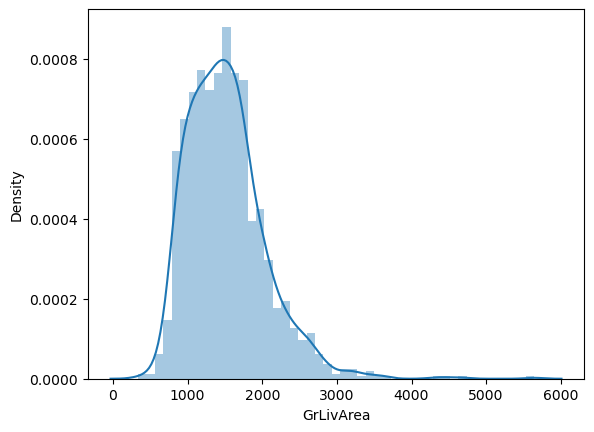

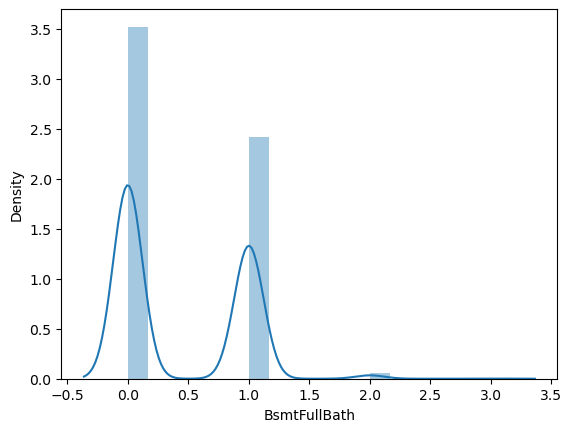

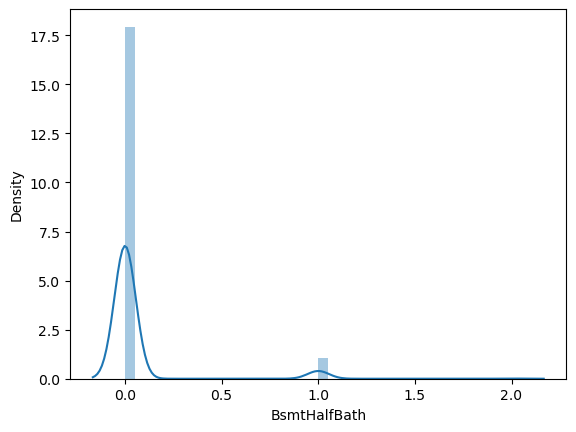

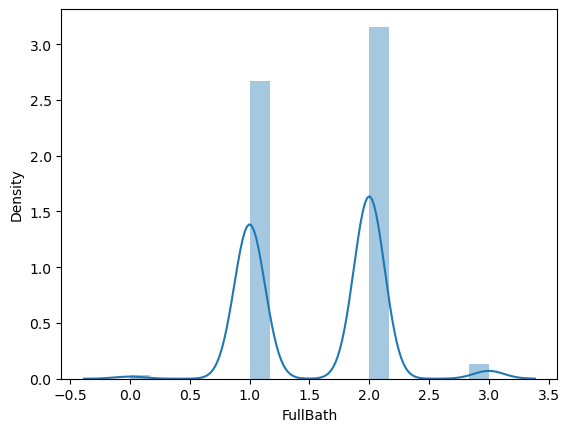

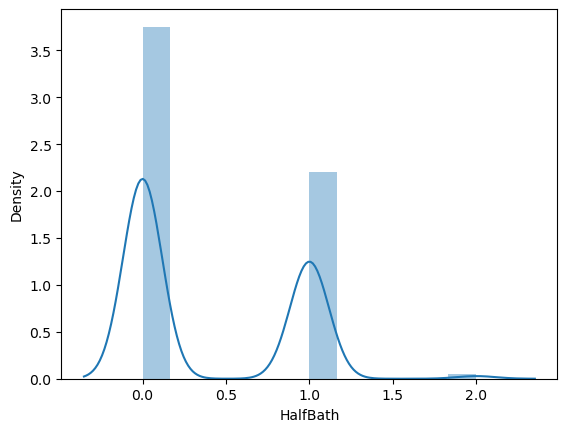

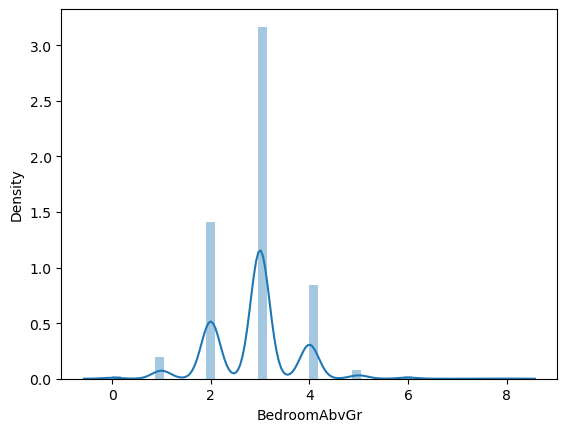

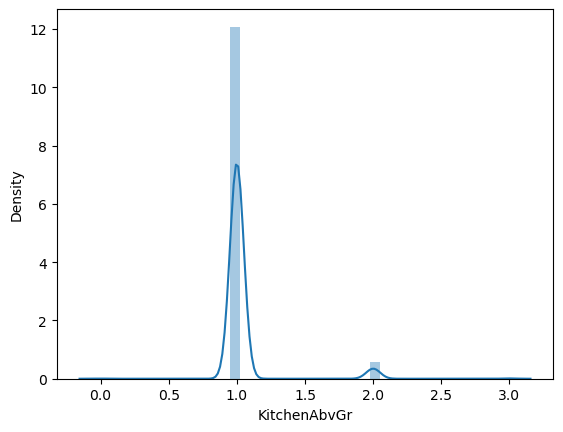

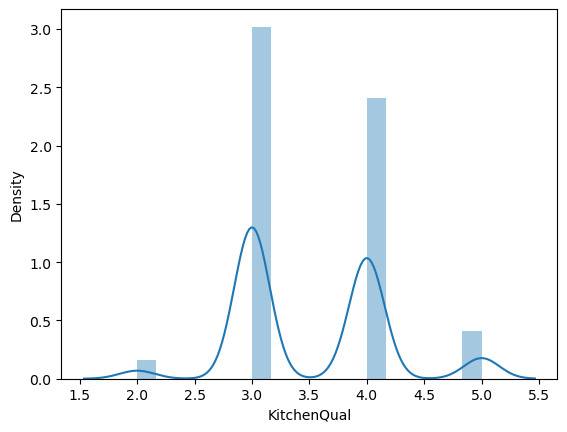

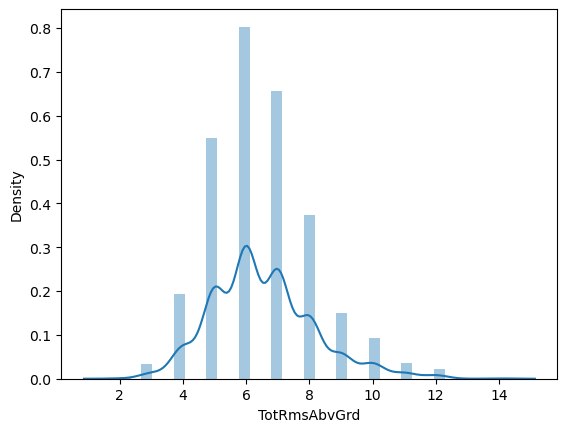

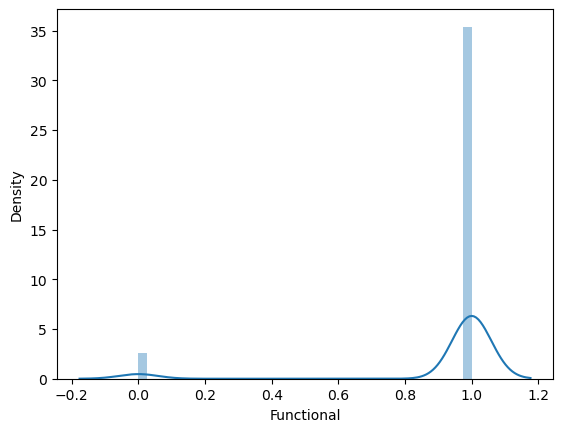

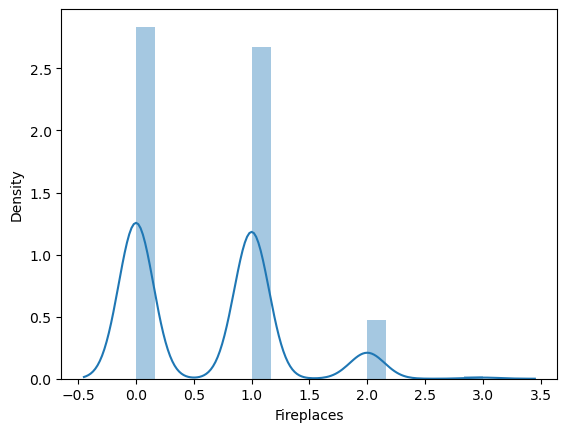

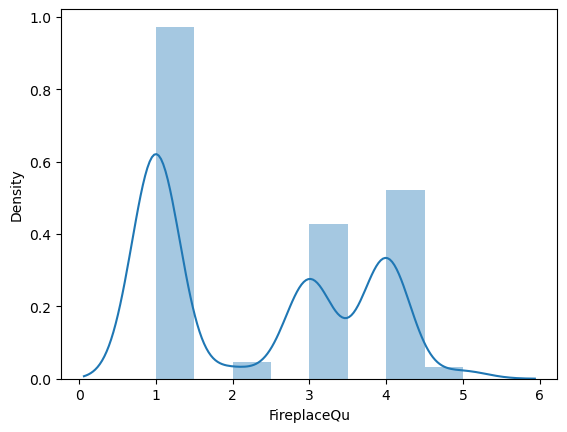

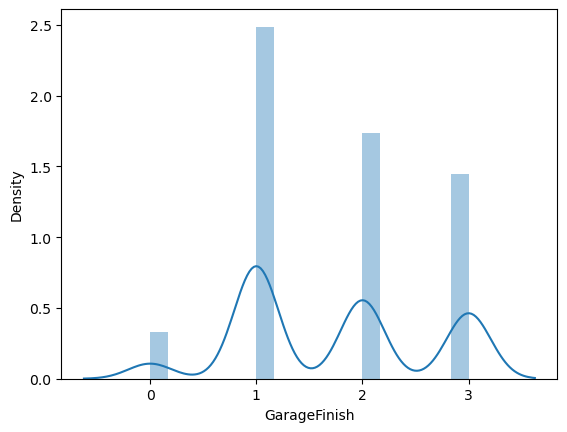

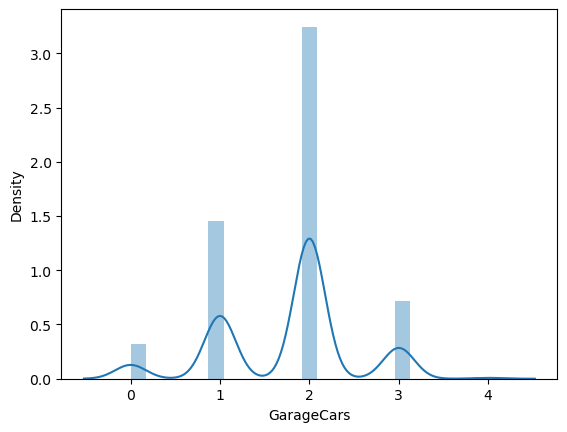

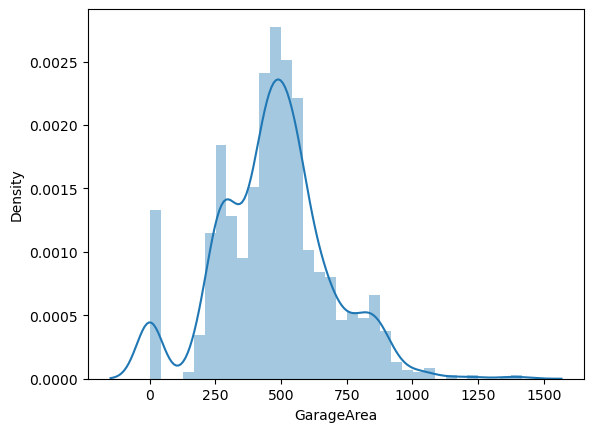

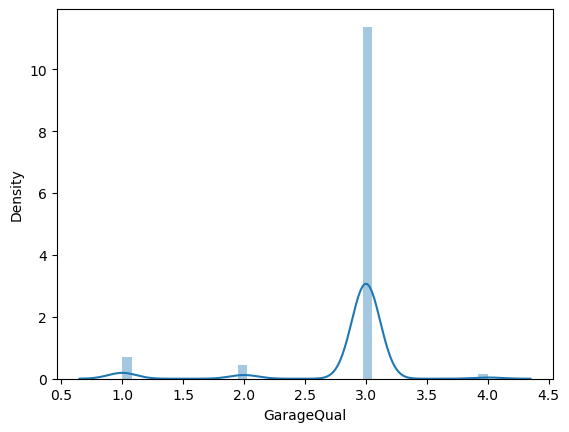

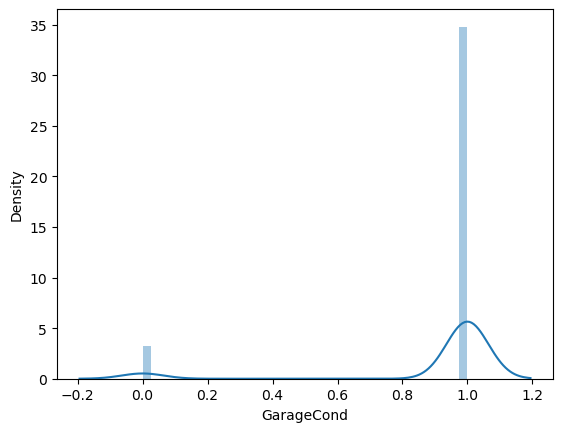

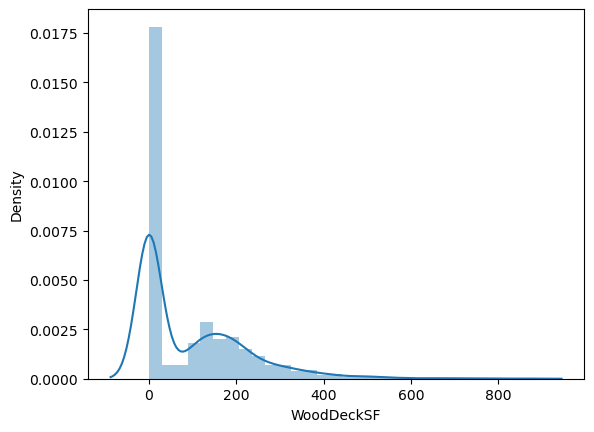

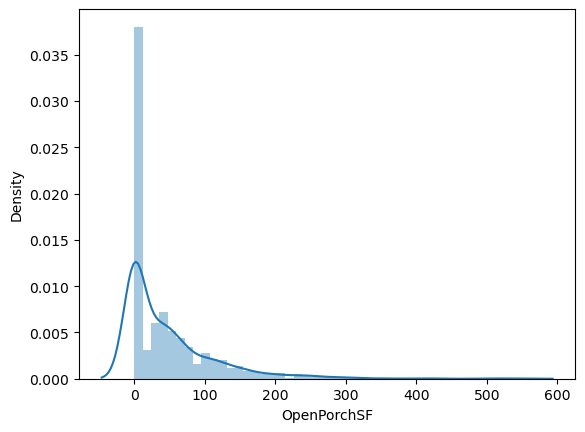

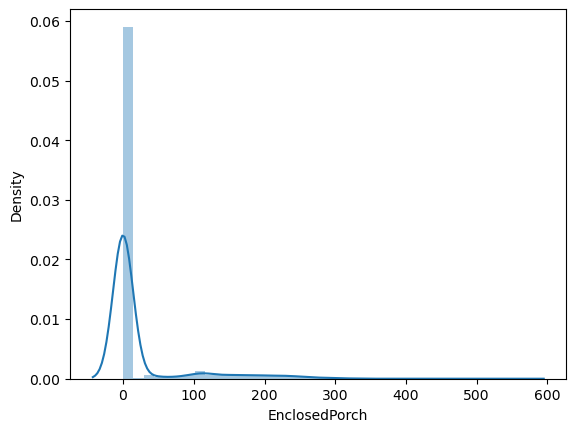

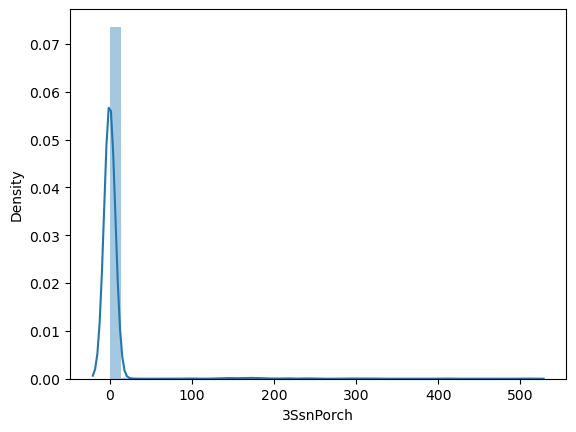

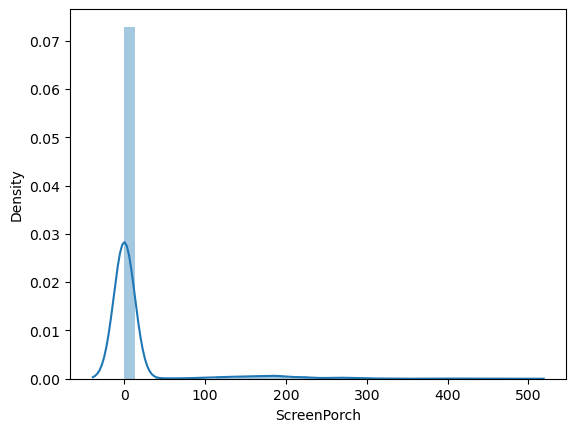

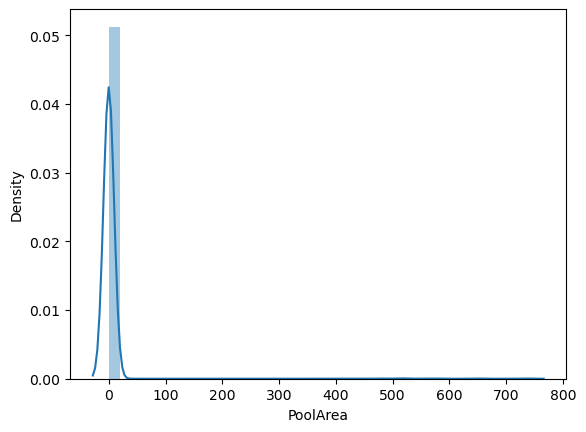

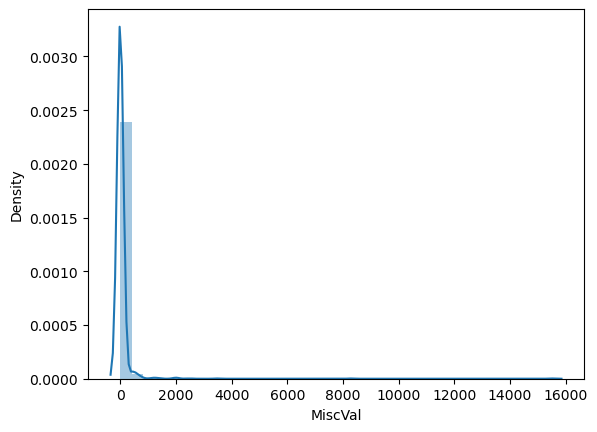

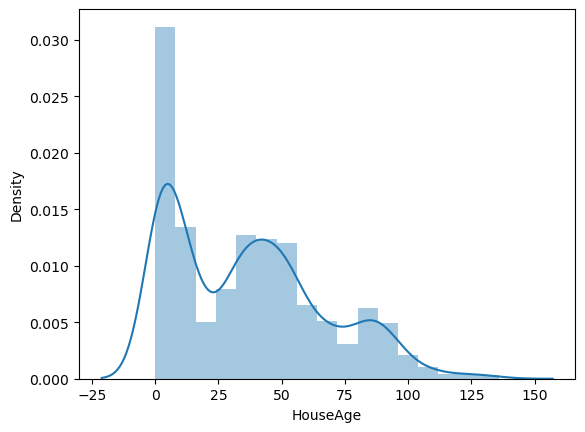

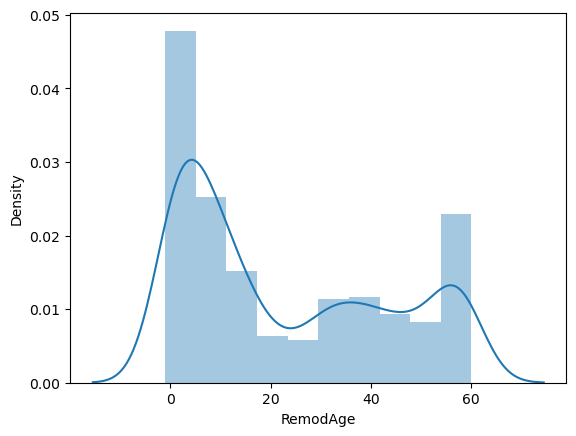

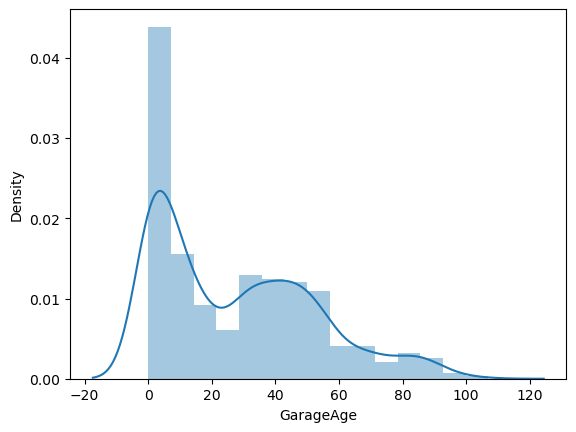

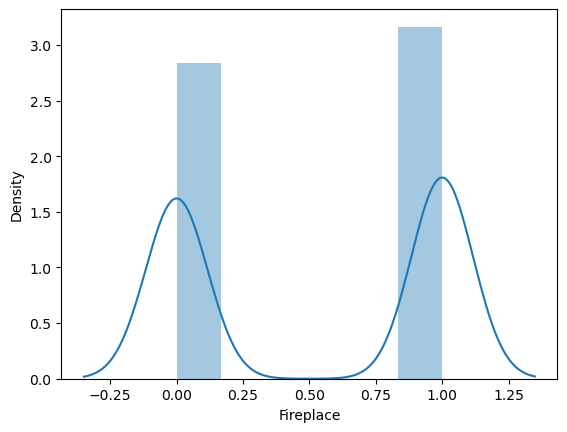

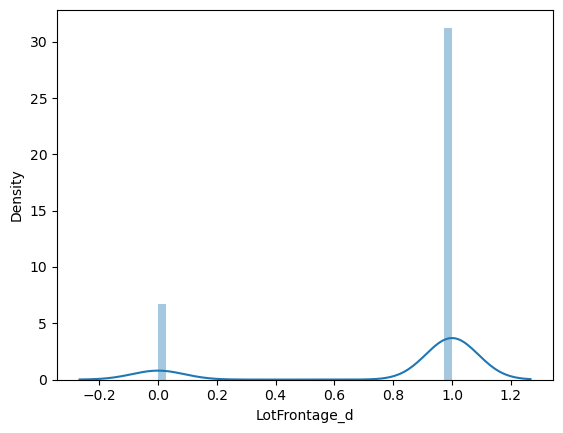

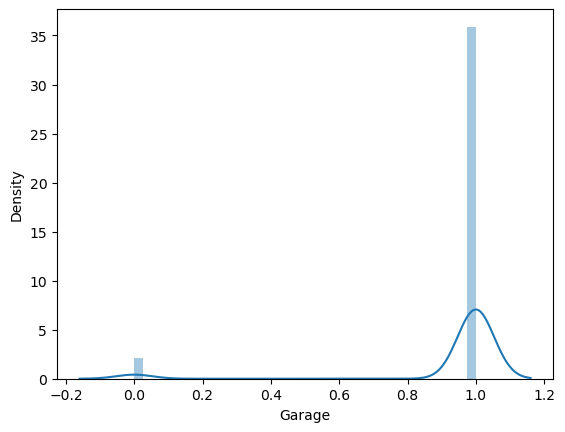

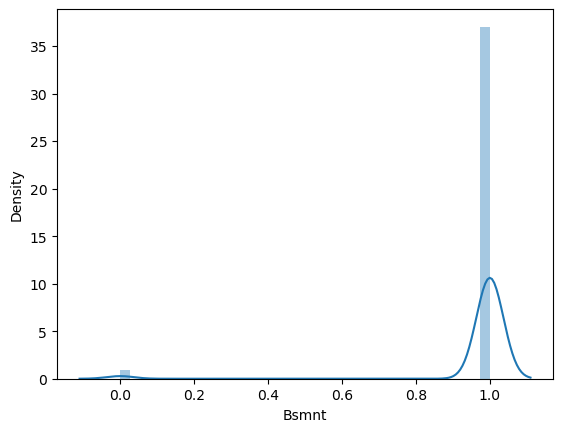

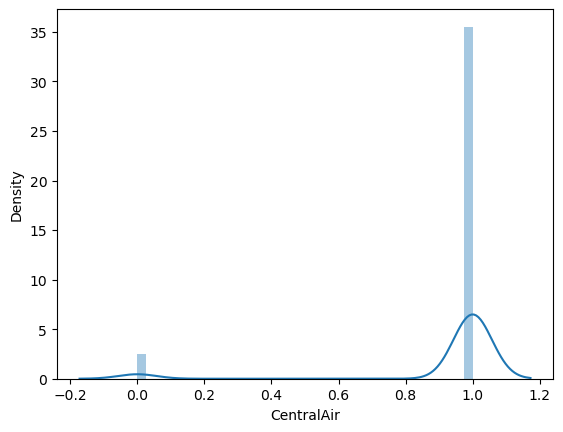

In [317]:
for x in numeric:
    sns.distplot(data[x])
    plt.show()

In [318]:
print(data[numeric].corr())

               SalePrice  LotFrontage   LotArea  LotShape  LandContour  \
SalePrice       1.000000     0.209624  0.263843  0.274437     0.158437   
LotFrontage     0.209624     1.000000  0.100739 -0.132361     0.009558   
LotArea         0.263843     0.100739  1.000000  0.291768     0.183715   
LotShape        0.274437    -0.132361  0.291768  1.000000     0.155047   
LandContour     0.158437     0.009558  0.183715  0.155047     1.000000   
LotConfig       0.141818    -0.219099  0.179440  0.357149     0.094931   
LandSlope       0.051116    -0.021940  0.310711  0.124113     0.291866   
BldgType       -0.185091    -0.073805 -0.055618 -0.147044    -0.039588   
OverallQual     0.790982     0.176561  0.105806  0.201765     0.105468   
OverallCond    -0.077856    -0.053457 -0.005636 -0.026701    -0.042437   
MasVnrArea      0.472614     0.105010  0.103321  0.095464     0.030356   
ExterQual       0.682639     0.127864  0.055570  0.190689     0.090455   
ExterCond       0.142018     0.000719 

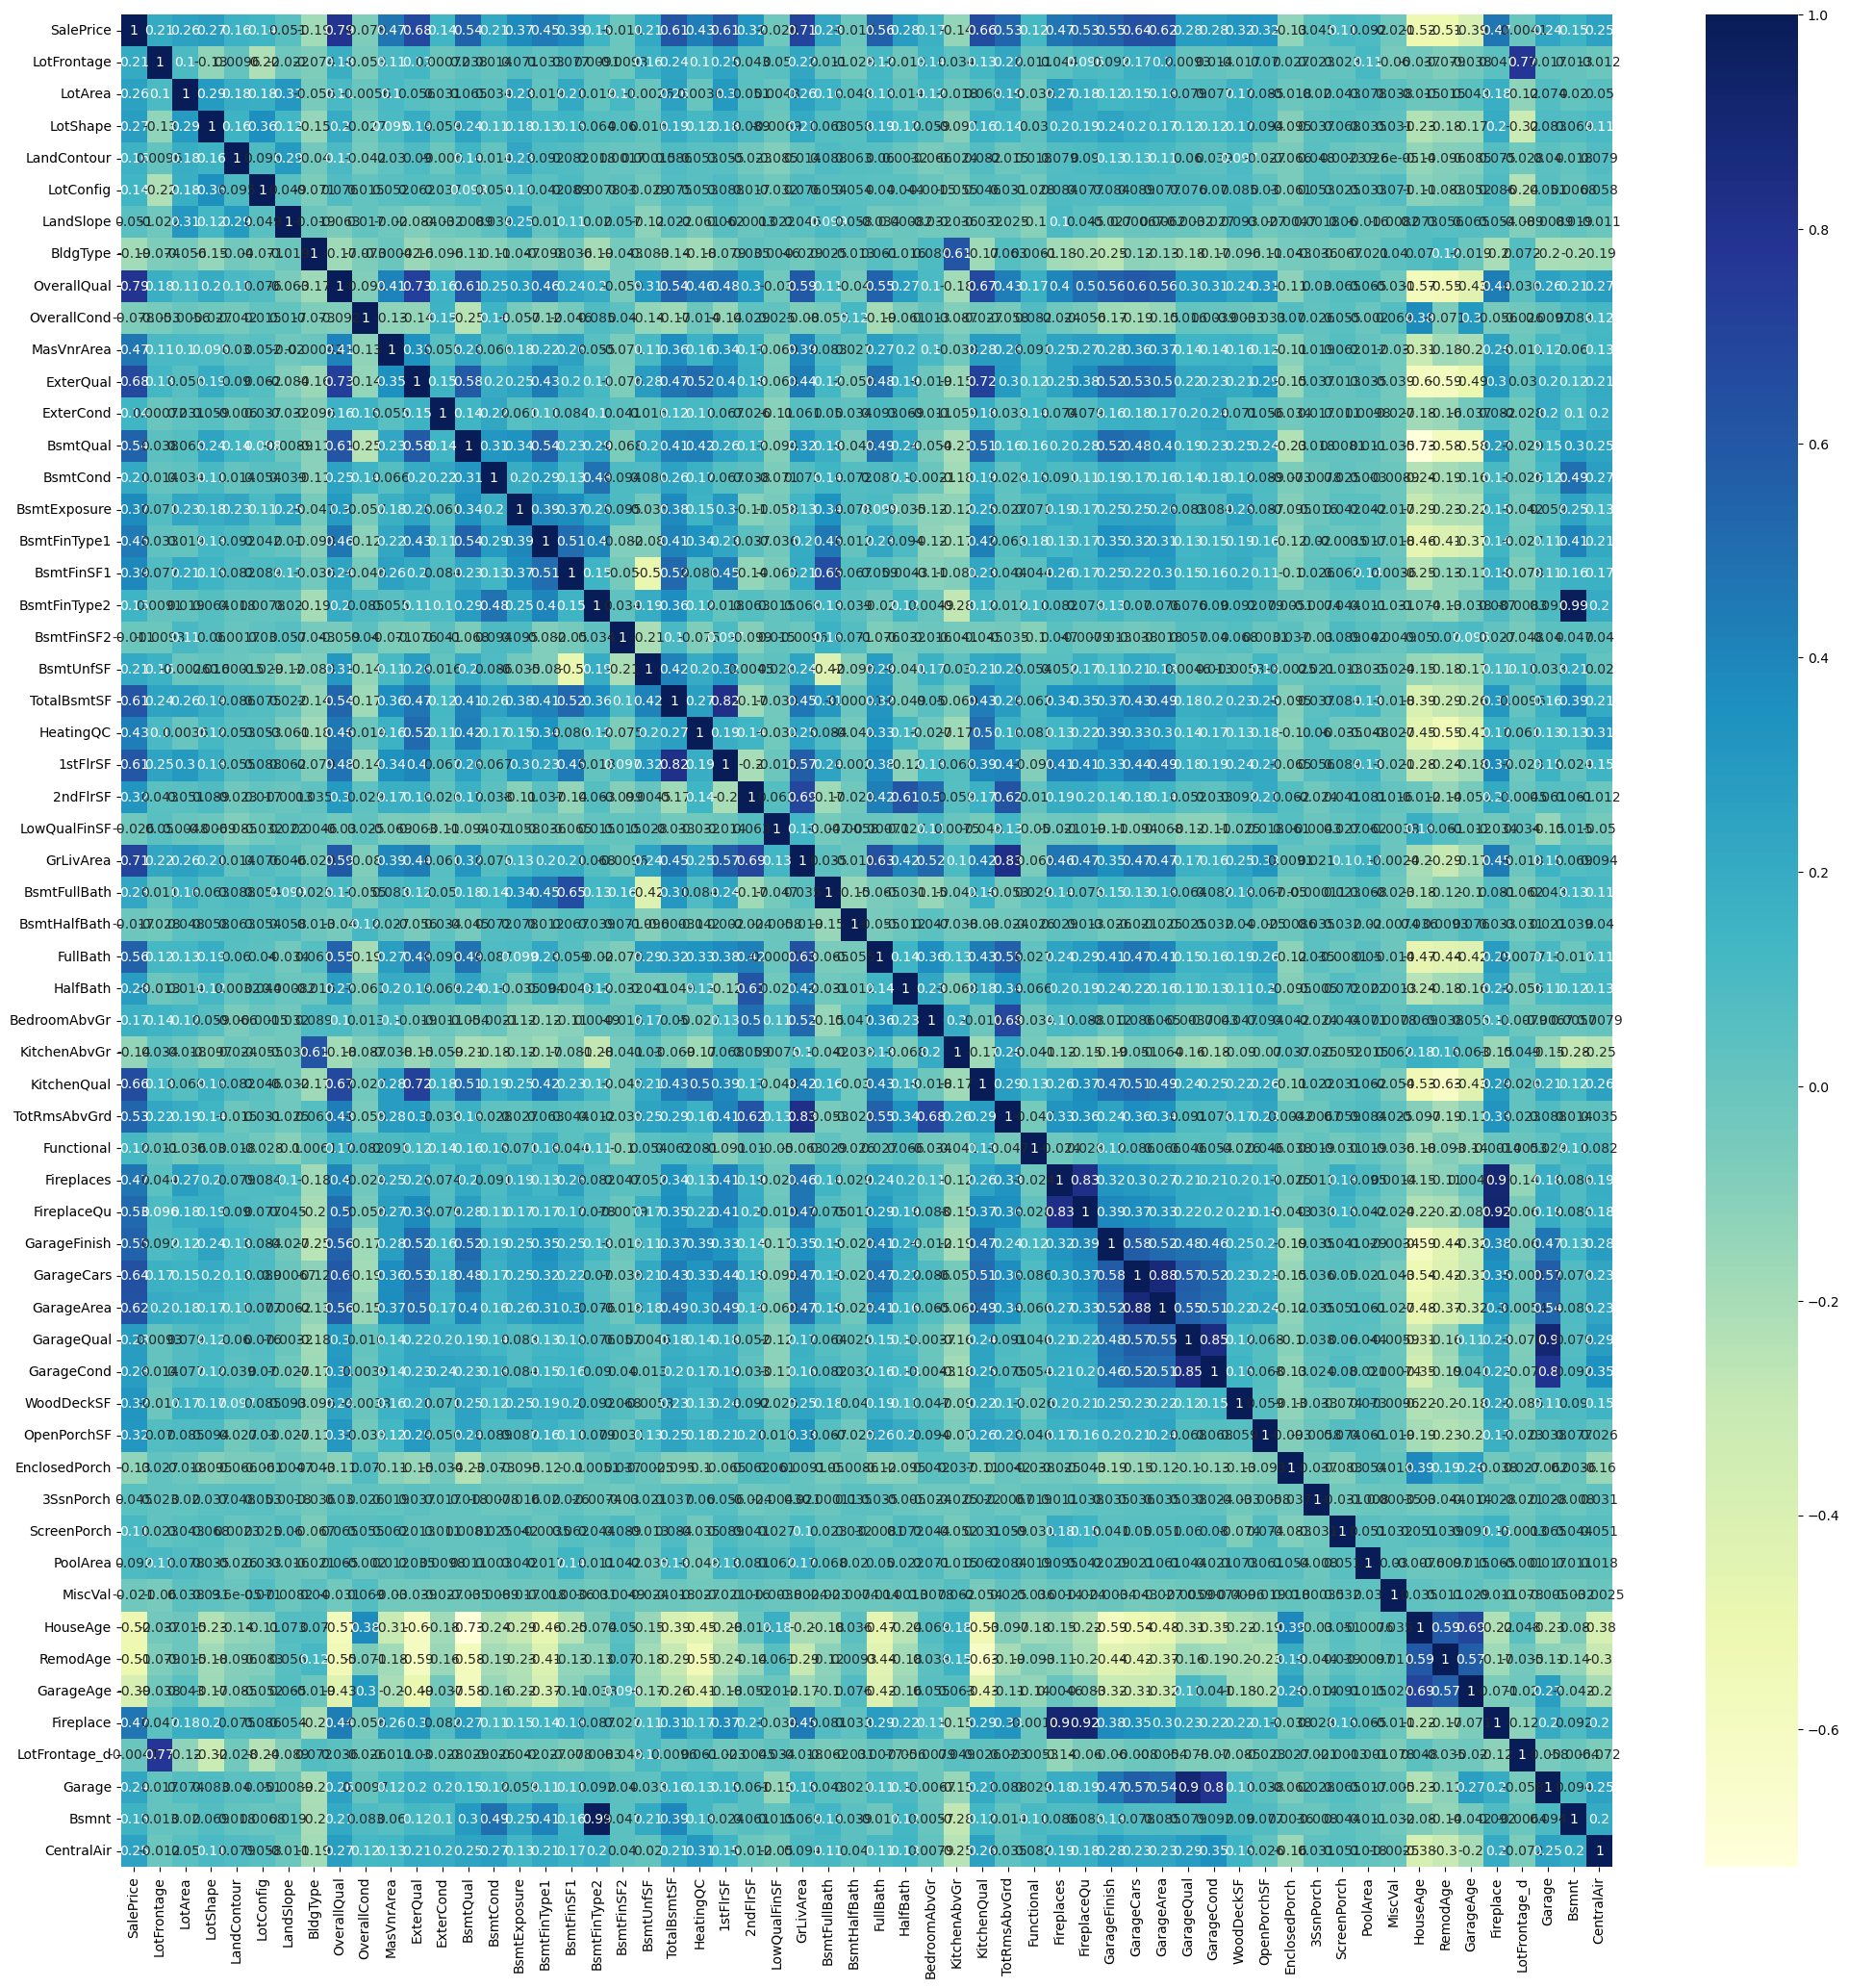

In [319]:
plt.figure(figsize=(25,25))
sns.heatmap(data[numeric].corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Following numeric variables can be seen to have correlation > 0.5
#### 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'GarageFinish', 'BsmtQual', 'TotRmsAbvGrd', 'FireplaceQu', 'HouseAge', 'RemodAge'

## 4. Data Preparation 



In [320]:
# split into X and y
X = data.loc[:, data.columns != 'SalePrice']
y = data['SalePrice'] 


#### 4.1 Dummy Variable creation

In [321]:
X = pd.get_dummies(X, columns = categorical, drop_first = True)

In [322]:
# split into train and test based on 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

## 5. Model Building and Evaluation

### Linear Regression

1. Simple Linear Regression is used to find a suitable model. 
2. Variable selection is done based on p values and VIF
3. Lasso and Ridge regression is applied on the model thus selected
4. Lasso regression is also evaluated for Feature reduction where feasible.
5. 5 fold Cross Validation is used on train dataset is used to determine the optimum alpha parmeter. 
6. Train Test is split on 80:20 split
7. 5 fold CV is only applied on Train dataset
8. Using the optimum parameter ridge/lasso regression is fitted on the train data and also  evaluated on the unseen test data.
9. Model performance is evaluated on the unseen test data
10. Variable importance for both Ridge/Lasso regression is evaluated using the magnitude of the coefficients. Higher magnitude implies high variable importance.
11. Redidual Diagnostics are also performed to check for heteroscedasticity and normality of the residuals besides p value, F Statistic and VIF.

In [323]:
#User defined functions for fitting Normal Linear Regression, Lasso, Ridge regressions and Performance Evaluation

def LassoRegressionModel(X_train, X_test, y_train, y_test,params):
    lasso = Lasso()
    # cross validation
    model_cv = GridSearchCV(estimator = lasso, 
                            param_grid = params, 
                            # using RMSE for scoring
                            scoring= 'neg_mean_absolute_error', 
                            cv = 5, 
                            return_train_score=True,
                            verbose = 1)            
    model_cv.fit(X_train, y_train) 
    
    #fit Lasso Regression using alpha found from CV
    alpha=model_cv.best_params_['alpha']
    print("\n","alpha = ",alpha)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train) 
    
    col = X_train.columns
    col_lasso = list(col[(lasso.coef_ != 0)])
    print("\n","No of features: ",len(col_lasso))
    
    #make predictions
    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)
    r2_train_lr = r2_score(y_train, y_pred_train)
    r2_test_lr = r2_score(y_test, y_pred_test)
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    metric = pd.DataFrame({'Metric':['r2','mse'],'Train':[r2_train_lr,mse_train_lr], 
                         'Test':[r2_test_lr,mse_test_lr]})
    metric.set_index('Metric')
    print("\n","Performance Metrics","\n",metric)
    
    #model parameters
    betas = pd.DataFrame(index=X_train.columns)
    betas.rows = X_train.columns
    betas['Lasso'] = lasso.coef_.reshape(-1,1)
    betas['Lasso_abs'] = abs(lasso.coef_.reshape(-1,1))
    pd.set_option('display.max_rows', None)
    betas=betas.sort_values(by=['Lasso_abs'],ascending=False)
    print("\n","Model Parameters","\n")
    print(betas)
    
    return y_pred_train,col_lasso;

def RidgeRegressionModel(X_train, X_test, y_train, y_test,params):
    ridge = Ridge()
    # cross validation
    model_cv = GridSearchCV(estimator = ridge, 
                            param_grid = params, 
                            # using RMSE for scoring
                            scoring= 'neg_mean_absolute_error', 
                            cv = 5, 
                            return_train_score=True,
                            verbose = 1)            
    model_cv.fit(X_train, y_train) 
    #fit Ridge Regression using alpha found from CV
    alpha=model_cv.best_params_['alpha']
    print("\n","alpha = ",alpha)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train) 
    print("\n","No of features: ",len(X_train.columns))
    
    #make predictions
    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)
    r2_train_lr = r2_score(y_train, y_pred_train)
    r2_test_lr = r2_score(y_test, y_pred_test)
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    metric = pd.DataFrame({'Metric':['r2','mse'],'Train':[r2_train_lr,mse_train_lr], 
                         'Test':[r2_test_lr,mse_test_lr]})
    metric.set_index('Metric')
    print("\n","Performance Metrics","\n",metric)
    
    #model parameters
    betas = pd.DataFrame(index=X_train.columns)
    betas.rows = X_train.columns
    betas['Ridge'] = ridge.coef_.reshape(-1,1)
    betas['Ridge_abs'] = abs(ridge.coef_.reshape(-1,1))
    pd.set_option('display.max_rows', None)
    betas=betas.sort_values(by=['Ridge_abs'],ascending=False)
    print("\n","Model Parameters","\n")
    print(betas)
    
    return y_pred_train
    
def BuildStatsModel(X_train, X_test, y_train, y_test):
    #Building model using statsmodel, for the detailed statistics
    # Adding a constant variable 
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
    
    #calculate performance metrics
    y_pred_train = lm.predict(X_train)
    X_test = sm.add_constant(X_test)
    y_pred_test = lm.predict(X_test)
    y_pred_train=y_pred_train.to_numpy()
    y_pred_test=y_pred_test.to_numpy()
    r2_train_lr = r2_score(y_train, y_pred_train)
    r2_test_lr = r2_score(y_test, y_pred_test)
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    metric = pd.DataFrame({'Metric':['r2','mse'],'Train':[r2_train_lr,mse_train_lr], 
                         'Test':[r2_test_lr,mse_test_lr]})
    metric.set_index('Metric')
    print("\n","\n","Performance Metrics","\n",metric)
    
    #summary of the linear model
    print(lm.summary())
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return y_pred_train

def ResidualDiagnostics(y_train,y_pred_train):
    #residual
    residual = y_train - y_pred_train.reshape(-1,1)

    #plot residual scatter plot
    plt.scatter( y_pred_train , residual)
    plt.axhline(y=0, color='r', linestyle=':')
    plt.xlabel("Predicted SalePrice")
    plt.ylabel("Residual")
    plt.show()

    # Distribution of errors
    p = sns.distplot(residual,kde=True)
    p = plt.title('Normality of error terms/residuals')
    plt.xlabel("Residual")
    plt.show() 


#### MinMax Scaling is applied

In [324]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [325]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = X.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)


In [326]:
# convert back to dataframe
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

In [327]:
X.columns.shape

(205,)

#### Round 1: Linear Regression using all models

In [328]:
y_pred_train=BuildStatsModel(X_train, X_test, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.908372  0.881945
1    mse  0.001109  0.001464
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     48.52
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:25   Log-Likelihood:                 2316.4
No. Observations:                1168   AIC:                            -4235.
Df Residuals:                     969   BIC:                            -3227.
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------

                  Features     VIF
125     Exterior1st_CBlock     inf
17              BsmtFinSF1     inf
53                  Garage     inf
122    Exterior1st_AsphShn     inf
136    Exterior2nd_AsphShn     inf
139     Exterior2nd_CBlock     inf
27               GrLivArea     inf
26            LowQualFinSF     inf
25                2ndFlrSF     inf
24                1stFlrSF     inf
21             TotalBsmtSF     inf
20               BsmtUnfSF     inf
19              BsmtFinSF2     inf
190  SaleCondition_Partial     inf
175    GarageType_No Value     inf
183           SaleType_New     inf
110        RoofStyle_Gable  137.08
112          RoofStyle_Hip  130.08
133    Exterior1st_VinylSd  104.23
148    Exterior2nd_VinylSd  100.19
170      GarageType_Attchd   99.12
129    Exterior1st_MetalSd   81.77
174      GarageType_Detchd   80.68
143    Exterior2nd_MetalSd   78.10
127    Exterior1st_HdBoard   55.82
75             MSZoning_RL   51.12
134    Exterior1st_Wd Sdng   50.59
141    Exterior2nd_H

#### Round 2: Linear Regression using only variables which were significant

In [329]:
var1 = ['LotArea', 'LotConfig', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtExposure', 'BsmtFinSF1', 
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 
        'Functional', 'Fireplaces', 'PoolArea', 'Fireplace', 'Garage', 'Bsmnt', 'HouseAge', 'Remodeled', 'MSSubClass_120', 
        'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 
        'Neighborhood_StoneBr', 'Condition1_Norm', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 
        'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'SaleType_New', 
         'MoSold_6', 'MoSold_8', 'MoSold_10']

X_train_subset = X_train[var1]
X_test_subset = X_test[var1]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.884381  0.883452
1    mse  0.001399  0.001445
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     195.2
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:29   Log-Likelihood:                 2180.6
No. Observations:                1168   AIC:                            -4271.
Df Residuals:                    1123   BIC:                            -4043.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

#### Round 3 remove variable based on p value and VIF

In [330]:
var2 = list(set(var1).symmetric_difference(set(['Fireplace'])))
X_train_subset = X_train[var2]
X_test_subset = X_test[var2]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.883715  0.884509
1    mse  0.001407  0.001432
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     198.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:29   Log-Likelihood:                 2177.2
No. Observations:                1168   AIC:                            -4266.
Df Residuals:                    1124   BIC:                            -4044.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

#### Round 4 remove variable based on p value and VIF

In [331]:
var3 = list(set(var2).symmetric_difference(set(['GrLivArea'])))
X_train_subset = X_train[var3]
X_test_subset = X_test[var3]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.883701  0.885023
1    mse  0.001408  0.001426
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     203.5
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:29   Log-Likelihood:                 2177.2
No. Observations:                1168   AIC:                            -4268.
Df Residuals:                    1125   BIC:                            -4051.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

it can be seen that GrLivArea removal has negligible impact on model performance. This supports the removal of this variable even though it happens to be highly correlated to SalePrice

#### Round 5 remove variable based on p value and VIF

In [332]:
var4 = list(set(var3).symmetric_difference(set(['MSZoning_RM'])))
X_train_subset = X_train[var4]
X_test_subset = X_test[var4]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.883576  0.884797
1    mse  0.001409  0.001428
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     208.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:30   Log-Likelihood:                 2176.5
No. Observations:                1168   AIC:                            -4269.
Df Residuals:                    1126   BIC:                            -4056.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

#### Round 6 remove variable based on p value and VIF

In [333]:
var5 = list(set(var4).symmetric_difference(set(['Garage'])))
X_train_subset = X_train[var5]
X_test_subset = X_test[var5]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train     Test
0     r2  0.883550  0.88468
1    mse  0.001409  0.00143
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     213.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:30   Log-Likelihood:                 2176.4
No. Observations:                1168   AIC:                            -4271.
Df Residuals:                    1127   BIC:                            -4063.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------

#### Round 7 remove variable based on p value and VIF

In [334]:
var6 = list(set(var5).symmetric_difference(set(['MoSold_6'])))
X_train_subset = X_train[var6]
X_test_subset = X_test[var6]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric    Train      Test
0     r2  0.88346  0.884932
1    mse  0.00141  0.001427
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:30   Log-Likelihood:                 2176.0
No. Observations:                1168   AIC:                            -4272.
Df Residuals:                    1128   BIC:                            -4069.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------

#### Round 8 remove variable based on p value and VIF

In [335]:
var7 = list(set(var6).symmetric_difference(set(['MoSold_8'])))
X_train_subset = X_train[var7]
X_test_subset = X_test[var7]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.883270  0.884252
1    mse  0.001413  0.001435
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     224.8
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:30   Log-Likelihood:                 2175.0
No. Observations:                1168   AIC:                            -4272.
Df Residuals:                    1129   BIC:                            -4075.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

#### Round 9 remove variable based on p value and VIF

In [336]:
var8 = list(set(var7).symmetric_difference(set(['MSZoning_RH'])))
X_train_subset = X_train[var8]
X_test_subset = X_test[var8]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.883071  0.884237
1    mse  0.001415  0.001435
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     230.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:30   Log-Likelihood:                 2174.0
No. Observations:                1168   AIC:                            -4272.
Df Residuals:                    1130   BIC:                            -4080.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

#### Round 10 remove variable based on p value and VIF

In [337]:
var9 = list(set(var8).symmetric_difference(set(['PoolArea'])))
X_train_subset = X_train[var9]
X_test_subset = X_test[var9]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.881001  0.889398
1    mse  0.001440  0.001371
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     232.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:30   Log-Likelihood:                 2163.8
No. Observations:                1168   AIC:                            -4254.
Df Residuals:                    1131   BIC:                            -4066.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

#### Round 11 : Ridge Regression

In [338]:
X_train_subset = X_train[var9]
X_test_subset = X_test[var9]

#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

params = {'alpha': list(np. arange(0.145,0.146,0.00001))}

y_pred_train=RidgeRegressionModel(X_train_subset, X_test_subset, y_train, y_test,params)

Fitting 5 folds for each of 101 candidates, totalling 505 fits

 alpha =  0.1453200000000003

 No of features:  36

 Performance Metrics 
   Metric     Train      Test
0     r2  0.867147  0.886267
1    mse  0.001608  0.001410

 Model Parameters 

                         Ridge  Ridge_abs
RoofMatl_WdShngl      0.452096   0.452096
RoofMatl_CompShg      0.365152   0.365152
RoofMatl_Membran      0.353718   0.353718
RoofMatl_Tar&Grv      0.348162   0.348162
RoofMatl_WdShake      0.341024   0.341024
RoofMatl_Metal        0.322971   0.322971
RoofMatl_Roll         0.309858   0.309858
1stFlrSF              0.284957   0.284957
2ndFlrSF              0.127076   0.127076
OverallQual           0.125401   0.125401
TotalBsmtSF           0.121731   0.121731
BsmtFinSF1            0.114015   0.114015
LotArea               0.098160   0.098160
TotRmsAbvGrd          0.068737   0.068737
BedroomAbvGr         -0.065695   0.065695
Neighborhood_NoRidge  0.065127   0.065127
Neighborhood_NridgHt  0.055344   0.0553

#### Round 12 : Lasso Regression ********* Final Model **********

In [339]:
X_train_subset = X_train[var9]
X_test_subset = X_test[var9]

#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

params = {'alpha': list(np. arange(0.0000001,0.00001,0.0000001))}

y_pred_train,col_lasso = LassoRegressionModel(X_train_subset, X_test_subset, y_train, y_test,params)

Fitting 5 folds for each of 99 candidates, totalling 495 fits

 alpha =  9.9e-06

 No of features:  36

 Performance Metrics 
   Metric     Train      Test
0     r2  0.880232  0.889237
1    mse  0.001450  0.001373

 Model Parameters 

                         Lasso  Lasso_abs
RoofMatl_WdShngl      0.839656   0.839656
RoofMatl_Membran      0.787331   0.787331
RoofMatl_CompShg      0.754082   0.754082
RoofMatl_Metal        0.752147   0.752147
RoofMatl_Tar&Grv      0.742305   0.742305
RoofMatl_WdShake      0.736907   0.736907
RoofMatl_Roll         0.735068   0.735068
1stFlrSF              0.298899   0.298899
TotalBsmtSF           0.212844   0.212844
2ndFlrSF              0.150955   0.150955
BsmtFinSF1            0.145137   0.145137
OverallQual           0.113415   0.113415
LotArea               0.102333   0.102333
BedroomAbvGr         -0.073705   0.073705
KitchenAbvGr         -0.061787   0.061787
OverallCond           0.057339   0.057339
TotRmsAbvGrd          0.056587   0.056587
Neighborh

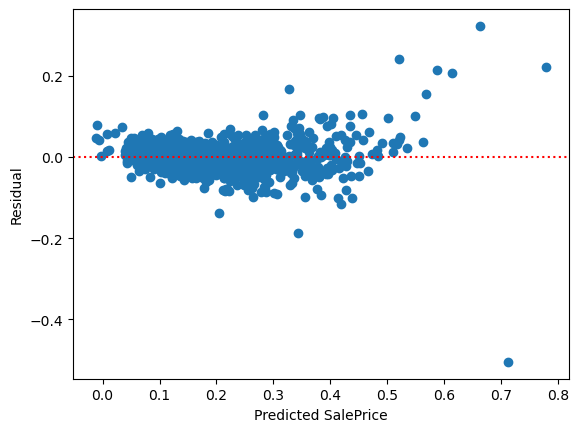

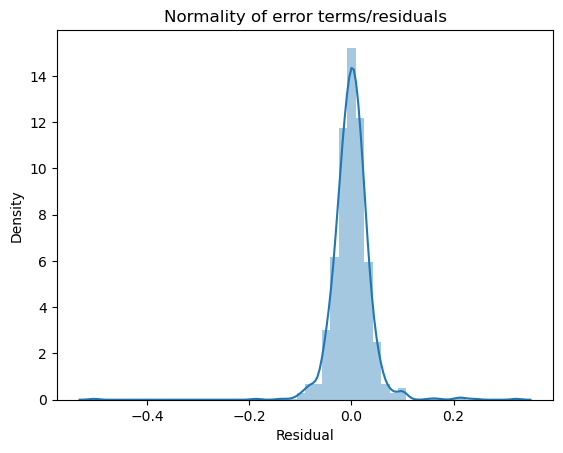

In [340]:
ResidualDiagnostics(y_train,y_pred_train)

#### check R2 for the top 5 variables

In [341]:
var10 = ['RoofMatl_WdShngl',  'RoofMatl_Membran',  'RoofMatl_CompShg',  'RoofMatl_Metal',  'RoofMatl_Tar&Grv',  
         'RoofMatl_WdShake',  'RoofMatl_Roll',  '1stFlrSF',  'TotalBsmtSF',  '2ndFlrSF',  'BsmtFinSF1']

X_train_subset = X_train[var10]
X_test_subset = X_test[var10]

y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.691181  0.721828
1    mse  0.003738  0.003449
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     235.2
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.12e-285
Time:                        19:21:36   Log-Likelihood:                 1606.8
No. Observations:                1168   AIC:                            -3190.
Df Residuals:                    1156   BIC:                            -3129.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------

## 6. Variable Importance

Based on the variables selected in Lasso Regression the following 5 variables are the most important. <br>
The variable importance can be assessed based on the magnitude of the coefficients. <br>
Higher magnitude imply higher weight within the model.
These 5 variables together explain roughly 69% of the variance in SalesPrice. This is calculated by only using these 5 variables in the regression

1. RoofMatl: Roof material
2. 1stFlrSF: First Floor square feet
3. TotalBsmtSF: Total square feet of basement area
4. 2ndFlrSF: Second floor square feet
5. BsmtFinSF1: Type 1 finished square feet

The 
Based on Lasso Regression the following 36 features in order of importance are able to explain 88% of the model variance

|Variable	|Lasso Abs Coeff	|Lasso Coeff|
| :- | :- | :- |
|RoofMatl_WdShngl	|0.840215	|0.840215|
|RoofMatl_Membran	|0.787858	|0.787858|
|RoofMatl_CompShg	|0.754625	|0.754625|
|RoofMatl_Metal	|0.752713	|0.752713|
|RoofMatl_Tar&Grv	|0.742879	|0.742879|
|RoofMatl_WdShake	|0.737492	|0.737492|
|RoofMatl_Roll	|0.735633	|0.735633|
|1stFlrSF	|0.298833	|0.298833|
|TotalBsmtSF	|0.213084	|0.213084|
|2ndFlrSF	|0.150987	|0.150987|
|BsmtFinSF1	|0.145169	|0.145169|
|OverallQual	|0.113394	|0.113394|
|LotArea	|0.102336	|0.102336|
|BedroomAbvGr	|0.073718	|-0.073718|
|KitchenAbvGr	|0.0618	|-0.0618|
|OverallCond	|0.057348	|0.057348|
|TotRmsAbvGrd	|0.056579	|0.056579|
|Neighborhood_NoRidge	|0.05568	|0.05568|
|Neighborhood_NridgHt	|0.050474	|0.050474|
|Neighborhood_StoneBr	|0.049601	|0.049601|
|Bsmnt	|0.047033	|-0.047033|
|HouseAge	|0.046884	|-0.046884|
|KitchenQual	|0.035204	|0.035204|
|BsmtExposure	|0.035077	|0.035077|
|ExterQual	|0.033771	|0.033771|
|SaleType_New	|0.029879	|0.029879|
|MSZoning_FV	|0.026751	|0.026751|
|MasVnrArea	|0.026704	|0.026704|
|Fireplaces	|0.026061	|0.026061|
|Functional	|0.021843	|0.021843|
|MSSubClass_120	|0.021665	|-0.021665|
|MoSold_10	|0.015309	|-0.015309|
|LotConfig	|0.015113	|0.015113|
|Condition1_Norm	|0.013605	|0.013605|
|MSZoning_RL	|0.009957	|0.009957|
|Remodeled	|0.008131	|0.008131|

# Part II : Assignment Questions

#### Q1 Ridge and Lasso regression with twice the alpha

In [342]:
X_train_subset = X_train[var9]
X_test_subset = X_test[var9]

# twice alpha value
params = {'alpha': [0.29064]}

y_pred_train=RidgeRegressionModel(X_train_subset, X_test_subset, y_train, y_test,params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

 alpha =  0.29064

 No of features:  36

 Performance Metrics 
   Metric     Train      Test
0     r2  0.859186  0.883935
1    mse  0.001704  0.001439

 Model Parameters 

                         Ridge  Ridge_abs
RoofMatl_WdShngl      0.322169   0.322169
1stFlrSF              0.268098   0.268098
RoofMatl_CompShg      0.235801   0.235801
RoofMatl_Tar&Grv      0.217662   0.217662
RoofMatl_Membran      0.212373   0.212373
RoofMatl_WdShake      0.211381   0.211381
RoofMatl_Metal        0.185117   0.185117
RoofMatl_Roll         0.173406   0.173406
OverallQual           0.129862   0.129862
2ndFlrSF              0.116742   0.116742
BsmtFinSF1            0.103266   0.103266
TotalBsmtSF           0.099493   0.099493
LotArea               0.092821   0.092821
TotRmsAbvGrd          0.073915   0.073915
Neighborhood_NoRidge  0.068424   0.068424
BedroomAbvGr         -0.060160   0.060160
Neighborhood_NridgHt  0.056554   0.056554
Neighborhood

In [343]:
X_train_subset = X_train[var9]
X_test_subset = X_test[var9]

# twice alpha value
params = {'alpha': [0.0000198]}

y_pred_train,col_lasso = LassoRegressionModel(X_train_subset, X_test_subset, y_train, y_test,params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

 alpha =  1.98e-05

 No of features:  36

 Performance Metrics 
   Metric     Train      Test
0     r2  0.877942  0.888612
1    mse  0.001477  0.001381

 Model Parameters 

                         Lasso  Lasso_abs
RoofMatl_WdShngl      0.723497   0.723497
RoofMatl_Membran      0.657249   0.657249
RoofMatl_CompShg      0.636040   0.636040
RoofMatl_Tar&Grv      0.622868   0.622868
RoofMatl_Metal        0.621191   0.621191
RoofMatl_WdShake      0.616185   0.616185
RoofMatl_Roll         0.604641   0.604641
1stFlrSF              0.302659   0.302659
TotalBsmtSF           0.174468   0.174468
2ndFlrSF              0.144070   0.144070
BsmtFinSF1            0.135779   0.135779
OverallQual           0.117763   0.117763
LotArea               0.096832   0.096832
BedroomAbvGr         -0.068084   0.068084
Neighborhood_NoRidge  0.058285   0.058285
KitchenAbvGr         -0.057589   0.057589
TotRmsAbvGrd          0.057016   0.057016
OverallCond

#### Q3 Drop top 5 variables

In [344]:
var11  = ['LotArea', 'LotConfig', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtExposure', 
         'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 
        'Functional', 'Fireplaces', 'PoolArea', 'Garage', 'Bsmnt', 'HouseAge', 'Remodeled', 'MSSubClass_120', 
        'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 
        'Neighborhood_StoneBr', 'Condition1_Norm', 'SaleType_New', 
         'MoSold_6', 'MoSold_8', 'MoSold_10']

X_train_subset = X_train[var11 ]
X_test_subset = X_test[var11 ]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.831012  0.861625
1    mse  0.002045  0.001716
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:36   Log-Likelihood:                 1959.0
No. Observations:                1168   AIC:                            -3852.
Df Residuals:                    1135   BIC:                            -3685.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

In [345]:
var21  = list(set(var11).symmetric_difference(set(['MSZoning_RM'])))
X_train_subset = X_train[var21 ]
X_test_subset = X_test[var21 ]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.830857  0.861556
1    mse  0.002047  0.001716
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:36   Log-Likelihood:                 1958.4
No. Observations:                1168   AIC:                            -3853.
Df Residuals:                    1136   BIC:                            -3691.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

In [346]:
var31  = list(set(var21).symmetric_difference(set(['Bsmnt'])))
X_train_subset = X_train[var31 ]
X_test_subset = X_test[var31 ]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.830783  0.861473
1    mse  0.002048  0.001718
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.1
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:36   Log-Likelihood:                 1958.2
No. Observations:                1168   AIC:                            -3854.
Df Residuals:                    1137   BIC:                            -3697.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

In [347]:
var41  = list(set(var31).symmetric_difference(set(['MoSold_6'])))
X_train_subset = X_train[var41 ]
X_test_subset = X_test[var41 ]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.830607  0.861615
1    mse  0.002050  0.001716
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     192.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:36   Log-Likelihood:                 1957.6
No. Observations:                1168   AIC:                            -3855.
Df Residuals:                    1138   BIC:                            -3703.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

In [348]:
var51  = list(set(var41).symmetric_difference(set(['Garage'])))
X_train_subset = X_train[var51 ]
X_test_subset = X_test[var51 ]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.830396  0.861204
1    mse  0.002053  0.001721
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     199.2
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:37   Log-Likelihood:                 1956.8
No. Observations:                1168   AIC:                            -3856.
Df Residuals:                    1139   BIC:                            -3709.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

In [349]:
var61  = list(set(var51).symmetric_difference(set(['PoolArea'])))
X_train_subset = X_train[var61 ]
X_test_subset = X_test[var61 ]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.830165  0.862754
1    mse  0.002055  0.001702
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     206.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:37   Log-Likelihood:                 1956.0
No. Observations:                1168   AIC:                            -3856.
Df Residuals:                    1140   BIC:                            -3714.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

In [350]:
var71  = list(set(var61).symmetric_difference(set(['MoSold_8'])))
X_train_subset = X_train[var71]
X_test_subset = X_test[var71]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.829928  0.861900
1    mse  0.002058  0.001712
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:37   Log-Likelihood:                 1955.2
No. Observations:                1168   AIC:                            -3856.
Df Residuals:                    1141   BIC:                            -3720.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

In [351]:
var81  = list(set(var71).symmetric_difference(set(['MSZoning_RH'])))
X_train_subset = X_train[var81]
X_test_subset = X_test[var81]
y_pred_train=BuildStatsModel(X_train_subset, X_test_subset, y_train, y_test)


 
 Performance Metrics 
   Metric     Train      Test
0     r2  0.829630  0.861769
1    mse  0.002062  0.001714
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     222.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:21:37   Log-Likelihood:                 1954.2
No. Observations:                1168   AIC:                            -3856.
Df Residuals:                    1142   BIC:                            -3725.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------

In [352]:
X_train_subset = X_train[var81]
X_test_subset = X_test[var81]

#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}



y_pred_train=RidgeRegressionModel(X_train_subset, X_test_subset, y_train, y_test,params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

 alpha =  1.98e-05

 No of features:  25

 Performance Metrics 
   Metric     Train      Test
0     r2  0.829630  0.861769
1    mse  0.002062  0.001714

 Model Parameters 

                         Ridge  Ridge_abs
GrLivArea             0.343751   0.343751
LotArea               0.145420   0.145420
OverallQual           0.136062   0.136062
BedroomAbvGr         -0.076909   0.076909
Neighborhood_NoRidge  0.074594   0.074594
Neighborhood_NridgHt  0.061268   0.061268
Neighborhood_StoneBr  0.059978   0.059978
HouseAge             -0.055977   0.055977
BsmtExposure          0.050486   0.050486
OverallCond           0.049650   0.049650
TotRmsAbvGrd          0.048387   0.048387
KitchenQual           0.045419   0.045419
MasVnrArea            0.043924   0.043924
ExterQual             0.035225   0.035225
Fireplaces            0.034042   0.034042
KitchenAbvGr         -0.030541   0.030541
MSZoning_FV           0.026342   0.026342
SaleType_Ne

In [353]:
X_train_subset = X_train[var81]
X_test_subset = X_test[var81]

#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

params = {'alpha': list(np. arange(0.0000001,0.00001,0.0000001))}

y_pred_train,col_lasso = LassoRegressionModel(X_train_subset, X_test_subset, y_train, y_test,params)

Fitting 5 folds for each of 99 candidates, totalling 495 fits

 alpha =  1e-07

 No of features:  25

 Performance Metrics 
   Metric     Train      Test
0     r2  0.829630  0.861766
1    mse  0.002062  0.001714

 Model Parameters 

                         Lasso  Lasso_abs
GrLivArea             0.343743   0.343743
LotArea               0.145373   0.145373
OverallQual           0.136069   0.136069
BedroomAbvGr         -0.076878   0.076878
Neighborhood_NoRidge  0.074592   0.074592
Neighborhood_NridgHt  0.061266   0.061266
Neighborhood_StoneBr  0.059969   0.059969
HouseAge             -0.055972   0.055972
BsmtExposure          0.050487   0.050487
OverallCond           0.049641   0.049641
TotRmsAbvGrd          0.048368   0.048368
KitchenQual           0.045423   0.045423
MasVnrArea            0.043921   0.043921
ExterQual             0.035228   0.035228
Fireplaces            0.034045   0.034045
KitchenAbvGr         -0.030531   0.030531
MSZoning_FV           0.026338   0.026338
SaleType_Ne